# Analyzing Sentiment and Extracting Dominant Topics in 'Digital Music' Product Category Reviews on Amazon


This project focuses on the analysis of sentiment and extraction of dominant topics within the 'Digital Music' product category on Amazon. The objective is to gain insights into customer reviews and understand the connection between text-derived features and review scores. By performing text cleaning and normalization, a bag-of-words analysis is conducted to identify the dominant words associated with different star rating categories. Additionally, sentiment analysis is performed using an appropriate sentiment lexicon to demonstrate the relationship between text features and review scores.

Furthermore, a regression model is employed to evaluate the predictability of product ratings based on variables derived from the review text. This analysis aims to provide a deeper understanding of how sentiment and polarity influence the overall review scores.

In addition to sentiment analysis, a topic modeling approach is utilized to identify and analyze the topics that dominate the 'Digital Music' product category reviews. The focus is on uncovering the topics that are particularly significant for satisfied and dissatisfied customers, as well as understanding how specific product characteristics contribute to the dominance of different themes in customer reviews.

By conducting a comprehensive analysis of sentiment, text features, and dominant topics, this project aims to provide valuable insights into the 'Digital Music' product category, enabling companies to gain a better understanding of customer preferences and make informed decisions to improve product offerings and customer satisfaction.

## Importing necessary Libraries

In [1]:
!pip install wordcloud
!pip install afinn
!pip install textblob
!pip install counter
!pip install mord

The importance of each library in this study is as follows:

**pandas**: Used for data management, including reading, manipulating, and analyzing the dataset.

**numpy**: Used for numerical operations and data manipulation in the study.

**json**: Utilized for handling JSON data format.

**gzip**: Used for importing and working with compressed (gzip) files.

**matplotlib.pyplot**: Used for data visualization, including creating plots and charts.

**seaborn**: Used for advanced data visualization and statistical graphics.

**nltk**: Used for text analysis tasks, such as tokenization, stopword removal, and accessing sentiment lexicons.

**re**: Used for regular expression operations, such as pattern matching and text cleaning tasks.

**nltk.sentiment**: Used for sentiment analysis using the VADER lexicon and SentiWordNet lexicon.

**nltk.corpus.stopwords**: Used for accessing a collection of stopwords for text preprocessing.

**wordcloud**: Used for generating word clouds to visualize the dominant words in the 'Digital Music' product category reviews.

**afinn**: Utilized for sentiment analysis to determine the sentiment expressed in the review text.

**textblob**: Used for sentiment analysis and calculating polarity scores to understand the relationship between sentiment and review scores.

**counter**: Used for counting occurrences of words and analyzing their frequency in the text data.

**mord**: Employed for ordinal logistic regression, a statistical modeling technique used for modeling ordinal response variables in the study.

Note: Any libraries used further will be explained then and there.

In [2]:

#data management
import pandas as pd
import numpy as np
import json
#importing zip file of dataset
import gzip

#data visualization librarirlibraries 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#for text analysis
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
nltk.download('stopwords')

#sentiment analysis lexicon
nltk.download('vader_lexicon')
nltk.download('sentiwordnet')
from nltk.sentiment import SentimentIntensityAnalyzer

#data cleaning
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


## Importing data 

The provided code reads and parses a gzipped JSON file. The parse() function opens the file, reads each line, and converts it into a Python dictionary using json.loads(). The getDF() function calls parse() and organizes the dictionaries into a pandas DataFrame. Finally, the code uses getDF() to parse the 'Digital_Music_5.json.gz' file and store the data in the df DataFrame.

Converting the file to a pandas DataFrame enables efficient data manipulation and analysis, providing a structured and tabular representation. It simplifies tasks like filtering, sorting, and aggregating the data, making it easier to perform operations such as sentiment analysis.

### Data

The downloaded dataset is the Amazon Review Data (2018) by Jianmo Ni from UCSD, specifically focused on the 'Digital Music' product category. It is a subset of the data where each item in the dataset has at least five reviews. The data is in JSON format, with each review represented as a separate line. This dataset can be used for various research purposes, and it has been courced from: Jianmo Ni, Jiacheng Li, and Julian McAuley Empirical Methods in Natural Language Processing (EMNLP), 2019.

###Data Dictionary

This data dictionary provides a description of each column in the dataset and their corresponding attributes.

| Column Name     | Description                                               |
|-----------------|-----------------------------------------------------------|
| reviewerID      | ID of the reviewer, e.g., A2SUAM1J3GNN3B                  |
| asin            | ID of the product, e.g., 0000013714                        |
| reviewerName    | Name of the reviewer                                      |
| vote            | Helpful votes of the review                               |
| style           | A dictionary of the product metadata, e.g., "Format" is "Hardcover" |
| reviewText      | Text of the review                                        |
| overall         | Rating of the product                                     |
| summary         | Summary of the review                                     |
| reviewTime      | Time of the review (raw)                                  |
| unixReviewTime  | Time of the review (Unix time)                            |
| image           | Images that users post after they have received the product |
| verified        | Indicates whether the review is verified or not           |

Source: https://nijianmo.github.io/amazon/index.html
Jianmo Ni, Jiacheng Li, Julian McAuley Empirical Methods in Natural Language Processing (EMNLP), 2019

In [3]:
#importing data as zip file and organizing it into pandas dataframe 
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

#dataframe Digital_Music_5 assigned to variable df

df = getDF('Digital_Music_5.json.gz')

#this code is sourced from above mentioned reference to read the data file into pandas dataframe.

In [4]:
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5.0,3,True,"06 3, 2013",A2TYZ821XXK2YZ,3426958910,{'Format:': ' Audio CD'},Garrett,"This is awesome to listen to, A must-have for ...",Slayer Rules!,1370217600,NaN
1,5.0,NaN,True,"10 11, 2014",A3OFSREZADFUDY,3426958910,{'Format:': ' Audio CD'},Ad,bien,Five Stars,1412985600,NaN
2,5.0,NaN,True,"02 11, 2014",A2VAMODP8M77NG,3426958910,{'Format:': ' Audio CD'},JTGabq,It was great to hear the old stuff again and I...,SLAYER!!!!!!!!!!!!!!!!!!!!!,1392076800,NaN
3,4.0,3,False,"12 7, 2013",AAKSLZ9IDTEH0,3426958910,{'Format:': ' Audio CD'},john F&#039;n doe,well best of's are a bit poison normally but t...,slayer greatest hits! you mean everything righ...,1386374400,NaN
4,5.0,NaN,True,"06 12, 2016",A3OH43OZJLKI09,5557706259,{'Format:': ' Audio CD'},melinda a goodman,What can I say? This is Casting Crowns!!!This ...,"This is a good, blessing filled",1465689600,NaN


In [5]:
#identifying unique products and its style

# Convert the dictionaries in the 'style' column to strings
df['style_str'] = df['style'].apply(json.dumps)

# Get the unique values in the 'style_str' column
unique_styles = df['style_str'].unique()

# Print the unique styles
print("Type of products available on Amazon under category Digital MUsic:",unique_styles)


Type of products available on Amazon under category Digital MUsic: ['{"Format:": " Audio CD"}' '{"Format:": " MP3 Music"}'
 '{"Format:": " Vinyl"}' 'NaN' '{"Format:": " DVD"}'
 '{"Format:": " Audio Cassette"}' '{"Format:": " Vinyl Bound"}'
 '{"Format:": " Blu-ray"}' '{"Format:": " Amazon Video"}'
 '{"Format:": " Blu-ray Audio"}' '{"Format:": " DVD Audio"}']


The types of products available on Amazon under the category 'Digital Music' are Audio CD, MP3 Music, Vinyl, DVD, Audio Cassette, Vinyl Bound, Blu-ray, Amazon Video, Blu-ray Audio, and DVD Audio. There is also a value of 'NaN' indicating missing or undefined format information for some products.

## Preprocessing data: Cleaning, removing stopwords, lemmatization

Preprocessing is a crucial step in natural language processing to prepare text data for analysis. It involves tasks like tokenization, stopword removal, normalization, and handling special characters and punctuation. By cleaning and transforming the data, preprocessing ensures that text is in a suitable format for sentiment analysis and topic modeling, enabling accurate interpretation and extraction of meaningful insights from the text.

Data cleaning: 

Data cleaning is a crucial step in sentiment analysis and topic modeling. It involves removing noise, inconsistencies, and irrelevant information from the dataset. By ensuring clean and reliable data, we can improve the accuracy and reliability of our analysis, enabling us to uncover meaningful insights and make informed decisions based on the processed text data.

In [6]:
#counting the number of rows in dataset
num_rows = df.shape[0]
print("Number of reviews in the dataset:", num_rows)

# Print all column headings
column_headings = df.columns.tolist()
print("Column headings:", column_headings)

Number of reviews in the dataset: 169781
Column headings: ['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'image', 'style_str']


The dataset contains 169,781 reviews, and the columns include 'overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'image', and 'style_str'.

In [7]:
#check for any null values in 

columns_null_values = ["reviewText", "overall"]
null_counts = df.loc[:, columns_null_values].isnull().sum()
print(null_counts)


reviewText    158
overall         0
dtype: int64


There are 158 null values in the "reviewText" column and no null values in the "overall" column.

We remove the null value rows from the dataset as they affect the integrity of the data. 

In [8]:
#removing null values dataset
df = df.dropna(subset=['reviewText'])

Focus on using verified reviews for analysis as they provide reliable and trustworthy information compared to unverified reviews. Verified reviews are from customers who made verified purchases, ensuring authenticity and credibility. Utilizing verified reviews enhances the reliability and accuracy of the analysis.

In [9]:
#extracting verified reviews from the original dataset
df_verified = df[df['verified'] == True]
df_verified.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image,style_str
0,5.0,3,True,"06 3, 2013",A2TYZ821XXK2YZ,3426958910,{'Format:': ' Audio CD'},Garrett,"This is awesome to listen to, A must-have for ...",Slayer Rules!,1370217600,NaN,"{""Format:"": "" Audio CD""}"
1,5.0,NaN,True,"10 11, 2014",A3OFSREZADFUDY,3426958910,{'Format:': ' Audio CD'},Ad,bien,Five Stars,1412985600,NaN,"{""Format:"": "" Audio CD""}"
2,5.0,NaN,True,"02 11, 2014",A2VAMODP8M77NG,3426958910,{'Format:': ' Audio CD'},JTGabq,It was great to hear the old stuff again and I...,SLAYER!!!!!!!!!!!!!!!!!!!!!,1392076800,NaN,"{""Format:"": "" Audio CD""}"
4,5.0,NaN,True,"06 12, 2016",A3OH43OZJLKI09,5557706259,{'Format:': ' Audio CD'},melinda a goodman,What can I say? This is Casting Crowns!!!This ...,"This is a good, blessing filled",1465689600,NaN,"{""Format:"": "" Audio CD""}"
5,4.0,NaN,True,"11 19, 2015",A6JP9YYJCK3WO,5557706259,{'Format:': ' Audio CD'},Sylvia Arrowood,Enjoy Casting Crowns and their songs,Four Stars,1447891200,NaN,"{""Format:"": "" Audio CD""}"


In [10]:
df_verified.dtypes

overall           float64
vote               object
verified             bool
reviewTime         object
reviewerID         object
asin               object
style              object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
image              object
style_str          object
dtype: object

In [11]:
df_verified['summary'] = df_verified['summary'].astype(str)
df_verified['reviewText'] = df_verified['reviewText'].astype(str)
df_verified['style_str'] = df_verified['style_str'].astype(str)


C:\Users\Admin\AppData\Local\Temp\ipykernel_31352\171032065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_verified['summary'] = df_verified['summary'].astype(str)
C:\Users\Admin\AppData\Local\Temp\ipykernel_31352\171032065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_verified['reviewText'] = df_verified['reviewText'].astype(str)
C:\Users\Admin\AppData\Local\Temp\ipykernel_31352\171032065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [12]:
#counting the number of reviews after extracting
num_datapoints = len(df_verified)
print("Number of verified reviews:",num_datapoints)

Number of verified reviews: 148787


The number of verified reviews are 148787

In [13]:
#drop unnecessary columns
df_verified = df_verified.drop(['vote', 'reviewerName', 'asin', 'style', 'image', 'unixReviewTime'], axis=1)
df_verified.head()

,overall,verified,reviewTime,reviewerID,reviewText,summary,style_str
0,5.0,True,"06 3, 2013",A2TYZ821XXK2YZ,"This is awesome to listen to, A must-have for ...",Slayer Rules!,"{""Format:"": "" Audio CD""}"
1,5.0,True,"10 11, 2014",A3OFSREZADFUDY,bien,Five Stars,"{""Format:"": "" Audio CD""}"
2,5.0,True,"02 11, 2014",A2VAMODP8M77NG,It was great to hear the old stuff again and I...,SLAYER!!!!!!!!!!!!!!!!!!!!!,"{""Format:"": "" Audio CD""}"
4,5.0,True,"06 12, 2016",A3OH43OZJLKI09,What can I say? This is Casting Crowns!!!This ...,"This is a good, blessing filled","{""Format:"": "" Audio CD""}"
5,4.0,True,"11 19, 2015",A6JP9YYJCK3WO,Enjoy Casting Crowns and their songs,Four Stars,"{""Format:"": "" Audio CD""}"


Number of reviews in each style: {"Format:": " MP3 Music"}         132543
NaN                                 9369
{"Format:": " Audio CD"}            6623
{"Format:": " Vinyl"}                230
{"Format:": " DVD"}                   10
{"Format:": " Audio Cassette"}         4
{"Format:": " Blu-ray Audio"}          4
{"Format:": " Amazon Video"}           3
{"Format:": " Blu-ray"}                1
Name: style_str, dtype: int64


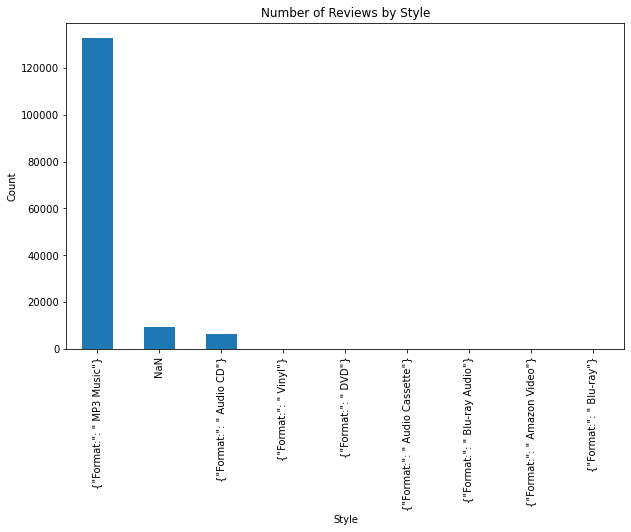

In [14]:
review_counts = df_verified['style_str'].value_counts()
print('Number of reviews in each style:',review_counts)

plt.figure(figsize=(10, 6))
review_counts.plot(kind='bar')
plt.title('Number of Reviews by Style')
plt.xlabel('Style')
plt.ylabel('Count')
plt.show()


The given information represents the number of reviews in each style for the 'Digital Music' product category:

- MP3 Music: 132,543 reviews
- NaN (unknown format): 9,369 reviews
- Audio CD: 6,623 reviews
- Vinyl: 230 reviews
- DVD: 10 reviews
- Audio Cassette: 4 reviews
- Blu-ray Audio: 4 reviews
- Amazon Video: 3 reviews
- Blu-ray: 1 review

This information provides an overview of the distribution of reviews across different formats or styles within the 'Digital Music' category.

In [15]:
#identifying the irrelevant strings in the text

def check_patterns(text):
    patterns = {
        'SC': r'[^A-Za-z0-9\s]',
        'HTML_T': r'<.*?>',
        'URLs': r'http\S+|www\S+',
        'Nos': r'\d+',
        'Phone': r'\b\d{10}\b',
        'Puctn': r'[^\w\s]'
    }

    matches = {}
    for pattern_name, pattern in patterns.items():
        match_found = bool(re.search(pattern, text))
        matches[pattern_name] = match_found
    
    return matches

# Apply the check_patterns function to the 'reviewText' column
df_verified['pattern_match'] = df_verified['reviewText'].apply(check_patterns)
df_verified['pattern_match'] 

0         {'SC': True, 'HTML_T': False, 'URLs': False, '...
1         {'SC': False, 'HTML_T': False, 'URLs': False, ...
2         {'SC': True, 'HTML_T': False, 'URLs': False, '...
4         {'SC': True, 'HTML_T': False, 'URLs': False, '...
5         {'SC': False, 'HTML_T': False, 'URLs': False, ...
                                ...                        
169776    {'SC': True, 'HTML_T': False, 'URLs': False, '...
169777    {'SC': True, 'HTML_T': False, 'URLs': False, '...
169778    {'SC': True, 'HTML_T': False, 'URLs': False, '...
169779    {'SC': True, 'HTML_T': False, 'URLs': False, '...
169780    {'SC': False, 'HTML_T': False, 'URLs': False, ...
Name: pattern_match, Length: 148787, dtype: object

It is evident that some irrelevant expressions exists in the text. 

In [16]:
# Delete the 'pattern_match' column
df_verified = df_verified.drop('pattern_match', axis=1)

**num2words**: allows for the conversion of numerical values to their corresponding word representation, facilitating text analysis and interpretation of numeric data.

In [17]:
!pip install num2words

The code snippet imports the `num2words` library and defines a `clean_text` function. This function is used to preprocess text by removing HTML tags, URLs, special characters (except apostrophes), and converting numbers to their textual representation using the `num2words` library. The function then applies this cleaning process to the 'reviewText' column of a DataFrame called `df_verified`. Finally, it displays the first few rows of the updated DataFrame.

In [18]:
from num2words import num2words

#cleaning text for better accuracy and reducing noise
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    #remove inverted apostrphes
    text = re.sub(r"(?<!\w)'|'(?!\w)", '', text)
    
    # Remove special characters except apostrophe
    text = re.sub(r'[^A-Za-z0-9\s\']', ' ', text)
    
    # Remove leading and trailing white spaces
    text = text.strip()
    
    # Remove extra white spaces
    text = re.sub(r'\s+', ' ', text)
    
    # Convert to lower case
    text = text.lower()
    
    # Convert numbers to text
    text = re.sub(r'\d+', lambda match: num2words(int(match.group())), text)
    
    return text

# Apply the clean_text function to the 'reviewText' column
df_verified['reviewText'] = df_verified['reviewText'].apply(clean_text)
df_verified.head()

,overall,verified,reviewTime,reviewerID,reviewText,summary,style_str
0,5.0,True,"06 3, 2013",A2TYZ821XXK2YZ,this is awesome to listen to a must have for a...,Slayer Rules!,"{""Format:"": "" Audio CD""}"
1,5.0,True,"10 11, 2014",A3OFSREZADFUDY,bien,Five Stars,"{""Format:"": "" Audio CD""}"
2,5.0,True,"02 11, 2014",A2VAMODP8M77NG,it was great to hear the old stuff again and i...,SLAYER!!!!!!!!!!!!!!!!!!!!!,"{""Format:"": "" Audio CD""}"
4,5.0,True,"06 12, 2016",A3OH43OZJLKI09,what can i say this is casting crowns this is ...,"This is a good, blessing filled","{""Format:"": "" Audio CD""}"
5,4.0,True,"11 19, 2015",A6JP9YYJCK3WO,enjoy casting crowns and their songs,Four Stars,"{""Format:"": "" Audio CD""}"


Next cell, performes similar operation on 'summary' column of the dataset

In [19]:
#cleaning text for better accuracy and reducing noise
def clean_text(text):
    # Remove HTML tags
        
    #remove inverted apostrphes
    text = re.sub(r"(?<!\w)'|'(?!\w)", '', text)
    
    # Remove special characters except apostrophe
    text = re.sub(r'[^A-Za-z0-9\s\']', ' ', text)
    
    # Remove leading and trailing white spaces
    text = text.strip()
    
    # Remove extra white spaces
    text = re.sub(r'\s+', ' ', text)
    
    # Convert to lower case
    text = text.lower()
    
    # Convert numbers to text
    text = re.sub(r'\d+', lambda match: num2words(int(match.group())), text)
    
    return text

# Apply the clean_text function to the 'reviewText' column
df_verified['summary'] = df_verified['summary'].apply(clean_text)
df_verified.head()

,overall,verified,reviewTime,reviewerID,reviewText,summary,style_str
0,5.0,True,"06 3, 2013",A2TYZ821XXK2YZ,this is awesome to listen to a must have for a...,slayer rules,"{""Format:"": "" Audio CD""}"
1,5.0,True,"10 11, 2014",A3OFSREZADFUDY,bien,five stars,"{""Format:"": "" Audio CD""}"
2,5.0,True,"02 11, 2014",A2VAMODP8M77NG,it was great to hear the old stuff again and i...,slayer,"{""Format:"": "" Audio CD""}"
4,5.0,True,"06 12, 2016",A3OH43OZJLKI09,what can i say this is casting crowns this is ...,this is a good blessing filled,"{""Format:"": "" Audio CD""}"
5,4.0,True,"11 19, 2015",A6JP9YYJCK3WO,enjoy casting crowns and their songs,four stars,"{""Format:"": "" Audio CD""}"


**pyspellchecker**:provides functionality for spell checking, allowing for the detection and correction of spelling errors in text data, which improves the accuracy and quality of textual analysis and processing.

In [20]:
!pip install pyspellchecker

The purpose of this code is to expand contractions in the text data. Contractions are shortened forms of words where an apostrophe is used to replace missing letters. By applying the expand_contractions function to the 'reviewText' column of your dataset using the apply() method, you will expand contractions in each review text, replacing contraction words with their full forms. For example, "don't" will be expanded to "do not" and "can't" will be expanded to "cannot".This helps in normalizing the text and making it more suitable for further analysis or processing.

In [21]:
#contractions and their expanded forms as needed

contractions = {
    
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he has",
    "how'd": "how did",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'll": "i will",
    "i'm": "i am",
    "i've": "i have",
    "is'nt": "is not",
    "it'd": "it would",
    "it'll": "it will",
    "it's": "it is",
    "let's": "let us",
    "must've": "must have",
    "mustn't": "must not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "should'nt": "should not",
    "that'd": "that would",
    "that's": "that is",
    "there'd": "there would",
    "there's": "there is",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "we'd": "we would",
    "we've": "we have",
    "what'll": "what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "where's": "where is",
    "who'd": "who would",
    "who'll": "who will",
    "who're": "who are",
    "who's": "who is",
    "who've": "who have",
    "won't": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "you'd": "you would",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have",
    "we'll": "we will"
}

def expand_contractions(text):
    words = text.split()
    expanded_words = [contractions[word] if word in contractions else word for word in words]
    expanded_text = ' '.join(expanded_words)
    return expanded_text

# Apply expand_contractions function to your dataset's text column
df_verified['reviewText'] = df_verified['reviewText'].apply(expand_contractions)

In [22]:
df_verified.head()

,overall,verified,reviewTime,reviewerID,reviewText,summary,style_str
0,5.0,True,"06 3, 2013",A2TYZ821XXK2YZ,this is awesome to listen to a must have for a...,slayer rules,"{""Format:"": "" Audio CD""}"
1,5.0,True,"10 11, 2014",A3OFSREZADFUDY,bien,five stars,"{""Format:"": "" Audio CD""}"
2,5.0,True,"02 11, 2014",A2VAMODP8M77NG,it was great to hear the old stuff again and i...,slayer,"{""Format:"": "" Audio CD""}"
4,5.0,True,"06 12, 2016",A3OH43OZJLKI09,what can i say this is casting crowns this is ...,this is a good blessing filled,"{""Format:"": "" Audio CD""}"
5,4.0,True,"11 19, 2015",A6JP9YYJCK3WO,enjoy casting crowns and their songs,four stars,"{""Format:"": "" Audio CD""}"


The code uses the matplotlib.pyplot library to create a line plot showing the number of reviews over time. It converts the "reviewTime" column to datetime format and groups the data by quarter and year. It counts the number of reviews for each quarter-year group and plots the time series, ensuring that all quarters and years within the dataset are included, even if there are no reviews for some periods. The plot is labeled with appropriate axes and title, and the x-axis tick labels are rotated for better readability.

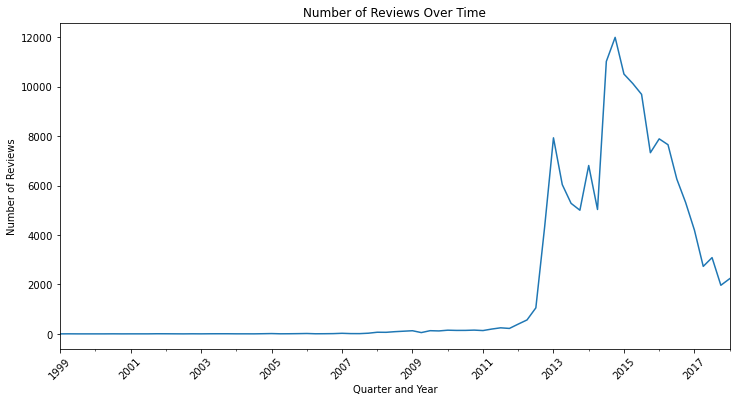

In [23]:

import matplotlib.pyplot as plt

# Convert "reviewTime" column to datetime format
df_verified['reviewTime'] = pd.to_datetime(df_verified['reviewTime'], format="%m %d, %Y")

# Create a new column for quarter and year
df_verified['quarter_year'] = df_verified['reviewTime'].dt.to_period('Q')

# Group the data by quarter and year and count the number of reviews
review_counts = df_verified.groupby('quarter_year').size()

# Find the minimum year with non-zero reviews
min_year = review_counts[review_counts > 0].index.min().start_time.year

# Get the maximum year from the dataset
max_year = df_verified['reviewTime'].dt.year.max()

# Filter the review counts to include only years within the dataset
review_counts = review_counts.loc[(review_counts.index.year >= min_year) & (review_counts.index.year <= max_year)]

# Generate a sequence of all quarters and years from the minimum year to the maximum year
all_quarters = pd.period_range(start=str(min_year), end=str(max_year), freq='Q')

# Reindex the review_counts to include all quarters and years, filling missing values with 0
review_counts = review_counts.reindex(all_quarters, fill_value=0)

# Plot the time series
plt.figure(figsize=(12, 6))
review_counts.plot(kind='line')
plt.xlabel('Quarter and Year')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Over Time')
plt.xticks(rotation=45)
plt.show()


The dataset covers reviews from 1999 to 2018, showing increased reviews over time and then a decline. However, data is only available till 2018, limiting insights. Analyzing recent data aids in understanding current trends for improved services.

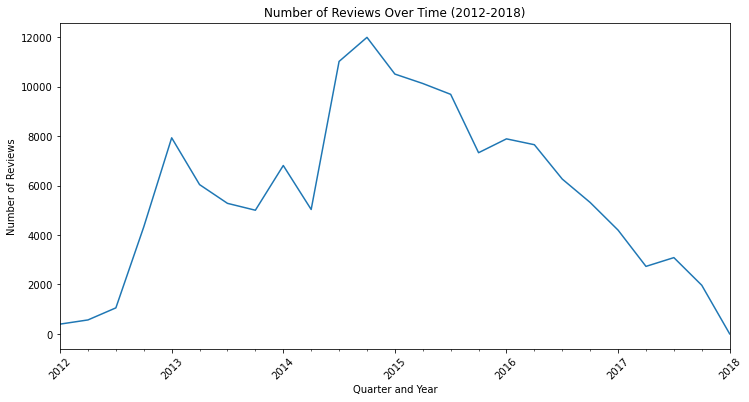

In [24]:
# Convert "reviewTime" column to datetime format
df_verified['reviewTime'] = pd.to_datetime(df_verified['reviewTime'], format="%m %d, %Y")

# Create a new column for quarter and year
df_verified['quarter_year'] = df_verified['reviewTime'].dt.to_period('Q')

# Group the data by quarter and year and count the number of reviews
review_counts = df_verified.groupby('quarter_year').size()

# Filter the review counts to include only years between 2012 and 2017
review_counts = review_counts.loc[(review_counts.index.year >= 2012) & (review_counts.index.year <= 2017)]

# Generate a sequence of all quarters and years from 2012 to 2017
all_quarters = pd.period_range(start='2012', end='2018', freq='Q')

# Reindex the review_counts to include all quarters and years, filling missing values with 0
review_counts = review_counts.reindex(all_quarters, fill_value=0)

# Plot the time series
plt.figure(figsize=(12, 6))
review_counts.plot(kind='line')
plt.xlabel('Quarter and Year')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Over Time (2012-2018)')
plt.xticks(rotation=45)
plt.show()


The analysis of the previous graph highlights an interesting trend: the highest number of reviews occurred in the third quarter of 2014. However, since then, there has been a decline in the number of reviews, which may be attributed to the emergence of competitors such as Spotify and Apple Music.

To gain more meaningful insights and improve services, it is essential to focus on studying more recent data. Analyzing the sentiment and conducting topic modeling on the current demand can provide valuable insights into customer preferences and expectations. By understanding the evolving landscape and addressing the needs of the present, it becomes possible to adapt and enhance the services offered to meet the changing market dynamics effectively.

## Extracting the sample 


We are extracting a sample from the dataset to work with a smaller subset of data due to the large size of the original dataset. This helps in reducing computational load and processing time, making it more feasible to perform analysis and modeling tasks. Additionally, working with a sample can provide representative insights and patterns from the data, allowing for meaningful analysis and decision-making while considering resource constraints.

In [25]:
import datetime

# Define the desired start date
start_date = datetime.datetime(2017,1,1)  # Change the date as per your requirement

# Filter the dataset based on the start date
recent_data = df_verified[df_verified['reviewTime'] >= start_date]
recent_data.head()

,overall,verified,reviewTime,reviewerID,reviewText,summary,style_str,quarter_year
14,5.0,True,2017-12-07,A1XL1WKRIGSTGE,elvis is still the best,five stars,"{""Format:"": "" Audio CD""}",2017Q4
26,5.0,True,2018-03-19,A1RY96KKGQ84EE,it is michael and it is good,five stars,"{""Format:"": "" Audio CD""}",2018Q1
27,5.0,True,2018-01-17,A3HO0XCG4KZ16R,great album it come with michael jackson great...,great album it come with michael jackson great...,"{""Format:"": "" Audio CD""}",2018Q1
28,5.0,True,2017-07-25,A3TM7P9GGJ6F4C,outstanding album all the hits i love one hund...,five stars,"{""Format:"": "" Audio CD""}",2017Q3
29,3.0,True,2017-05-31,A2N6RNHQJ65T0F,it has been a while since i have bought this c...,great if you don't have his music already,"{""Format:"": "" Audio CD""}",2017Q2


In [26]:
#counting the number of reviews after extracting
num_datapoints_recent = len(recent_data)
print("Number of recent reviews:",num_datapoints_recent)

Number of recent reviews: 16250


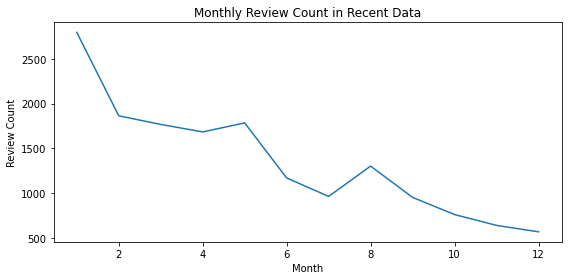

In [27]:

recent_data = recent_data.copy()
# Convert reviewTime to datetime
recent_data['reviewTime'] = pd.to_datetime(recent_data['reviewTime'])

# Extract year and month
recent_data['year'] = recent_data['reviewTime'].dt.year
recent_data['month'] = recent_data['reviewTime'].dt.month

# Review count by month
monthly_review_count = recent_data.groupby('month')['year'].count()

# Plotting
plt.figure(figsize=(8, 4))
sns.lineplot(x=monthly_review_count.index, y=monthly_review_count.values)
plt.xlabel('Month')
plt.ylabel('Review Count')
plt.title('Monthly Review Count in Recent Data')
plt.tight_layout()
plt.show()

In [28]:
recent_data.dtypes

overall                float64
verified                  bool
reviewTime      datetime64[ns]
reviewerID              object
reviewText              object
summary                 object
style_str               object
quarter_year     period[Q-DEC]
year                     int64
month                    int64
dtype: object

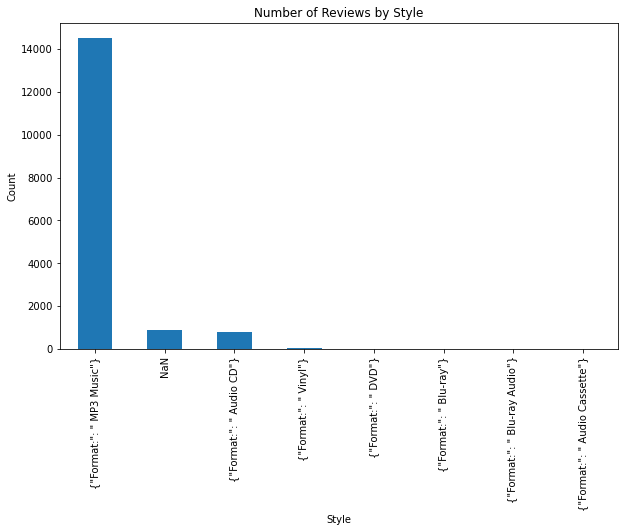

In [29]:
#Visualization of product style

review_counts = recent_data['style_str'].value_counts()

plt.figure(figsize=(10, 6))
review_counts.plot(kind='bar')
plt.title('Number of Reviews by Style')
plt.xlabel('Style')
plt.ylabel('Count')
plt.show()


Product style MP3 Music is the most reviewed in this dataset.

Number of unique reviewers: 3525


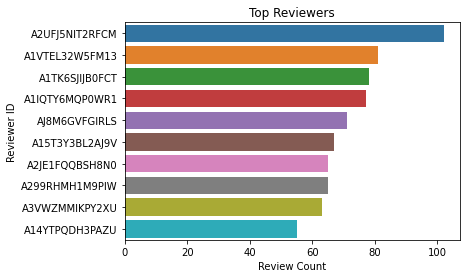

In [30]:
# Number of unique reviewers
num_reviewers = recent_data['reviewerID'].nunique()
print("Number of unique reviewers:", num_reviewers)

# Top reviewers by review count
top_reviewers = recent_data['reviewerID'].value_counts().head(10)
sns.barplot(x=top_reviewers.values, y=top_reviewers.index)
plt.xlabel('Review Count')
plt.ylabel('Reviewer ID')
plt.title('Top Reviewers')
plt.show()

In [151]:
print(top_reviewers)

A2UFJ5NIT2RFCM    102
A1VTEL32W5FM13     81
A1TK6SJIJB0FCT     78
A1IQTY6MQP0WR1     77
AJ8M6GVFGIRLS      71
A15T3Y3BL2AJ9V     67
A2JE1FQQBSH8N0     65
A299RHMH1M9PIW     65
A3VWZMMIKPY2XU     63
A14YTPQDH3PAZU     55
Name: reviewerID, dtype: int64


The output shows the top 10 reviewers based on the count of their reviews. The reviewer with the highest review count is "A2UFJ5NIT2RFCM" with 102 reviews, followed by "A1VTEL32W5FM13" with 81 reviews, "A1TK6SJIJB0FCT" with 78 reviews, and so on. The bar plot visualizes the review counts for each reviewer, with the reviewer IDs on the y-axis and the review count on the x-axis. The plot provides a clear comparison of the review counts among the top reviewers.

In [31]:

# Count the number of reviews for each overall rating
rating_counts = recent_data['overall'].value_counts()

# Print the result
print(rating_counts)


5.0    13363
4.0     2086
3.0      573
1.0      121
2.0      107
Name: overall, dtype: int64


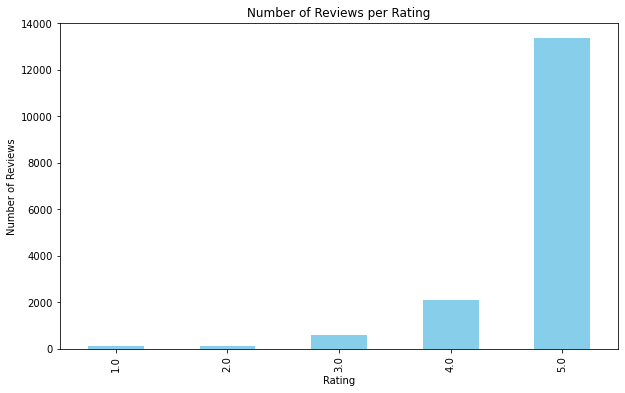

In [32]:
# Calculate the counts for each rating
rating_counts = recent_data.groupby('overall').size()

# Generate a bar plot for the counts
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Reviews per Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

The bar chart represent the number of reviews corresponding to each rating. 

- 5.0: 13363 reviews have an overall rating of 5.0, which indicates that these are highly positive reviews.
- 4.0: 2086 reviews have a rating of 4.0. These reviews are generally positive but may contain some criticism or areas for improvement.
- 3.0: 573 reviews have a rating of 3.0. These reviews are neutral, neither strongly positive nor negative. 
- 2.0: 107 reviews have a rating of 2.0. These are negative reviews, indicating dissatisfaction with the product or service.
- 1.0: 121 reviews have the lowest rating of


The **"punkt"** dataset, obtained from the nltk library, provides pre-trained tokenizers for different languages. These tokenizers can be used to split text into individual words or sentences, aiding in language processing tasks.

Downloading the **"stopwords"** corpus allows the removal of common and non-informative words (such as "the," "is," "and") from the dataset. Additional words, symbols, or special characters that hold no significance in the corpus can also be included using the syntax 'set(stopwords).union(set())'.

The **"WordNet"** corpus, also part of NLTK, is a lexical database that organizes words based on their meanings and relationships in the English language. It facilitates tasks such as synonym finding, word sense disambiguation, and semantic similarity calculation.

In [33]:
#stopwords is already downloaded

#Downloading 'WordNet' corpus
nltk.download('wordnet')   

#Downloading 'punkt'  
nltk.download('punkt')     

# Creating a variable 'stopwords_english' containing the default English stopwords
stopwords_eng = stopwords.words('english')   

#Applying a lambda function to the 'reviewText' column of the DataFrame 'df_verified' to remove stopwords from each sentence
recent_data['reviewText'] = recent_data['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_eng)]))   

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**POS tagging** (Part-of-Speech tagging) is the process of assigning a grammatical tag to each word in a sentence based on its part of speech, such as noun, verb, adjective, adverb, etc. It helps in understanding the syntactic structure of the text and identifying the role of each word in a sentence.


In [34]:
# Function to perform POS tagging on a sentence
#Downloading the 'averaged_perceptron_tagger' resource
nltk.download('averaged_perceptron_tagger')
def pos_tagging(text):
    tokens = nltk.word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)
    return tagged_tokens

# Apply the pos_tagging function to the 'reviewText' column
recent_data['pos_tags'] = recent_data['reviewText'].apply(pos_tagging)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [35]:
recent_data.head()

,overall,verified,reviewTime,reviewerID,reviewText,summary,style_str,quarter_year,year,month,pos_tags
14,5.0,True,2017-12-07,A1XL1WKRIGSTGE,elvis still best,five stars,"{""Format:"": "" Audio CD""}",2017Q4,2017,12,"[(elvis, NN), (still, RB), (best, JJS)]"
26,5.0,True,2018-03-19,A1RY96KKGQ84EE,michael good,five stars,"{""Format:"": "" Audio CD""}",2018Q1,2018,3,"[(michael, RB), (good, JJ)]"
27,5.0,True,2018-01-17,A3HO0XCG4KZ16R,great album come michael jackson greatest hits...,great album it come with michael jackson great...,"{""Format:"": "" Audio CD""}",2018Q1,2018,1,"[(great, JJ), (album, JJ), (come, NN), (michae..."
28,5.0,True,2017-07-25,A3TM7P9GGJ6F4C,outstanding album hits love one hundred percent,five stars,"{""Format:"": "" Audio CD""}",2017Q3,2017,7,"[(outstanding, JJ), (album, NN), (hits, NNS), ..."
29,3.0,True,2017-05-31,A2N6RNHQJ65T0F,since bought cd okay best music already,great if you don't have his music already,"{""Format:"": "" Audio CD""}",2017Q2,2017,5,"[(since, IN), (bought, VBN), (cd, NN), (okay, ..."


**Lemmatization** is the process of reducing words to their base or root form, which helps in standardizing the text and capturing the semantic meaning. It considers the context and part of speech of the word to produce a meaningful and valid base form. For example, the word "running" will be lemmatized to "run", and "better" will be lemmatized to "good".


-Why are we doing this?- 

In sentiment analysis, lemmatization and POS tagging are important preprocessing steps. Lemmatization reduces words to their base form, which can help in reducing the sparsity of the data and improving the accuracy of sentiment analysis. POS tagging provides information about the grammatical category of words, allowing for more accurate identification of sentiment-bearing words and capturing the nuances of sentiment based on the part of speech.

For example, considering the word "good", its sentiment can vary based on its part of speech. "Good" as an adjective (e.g., "a good movie") indicates positive sentiment, while "good" as an adverb (e.g., "the movie was good") may indicate a stronger positive sentiment. By considering the POS tags during sentiment analysis, we can better capture the sentiment expressed in the text and improve the accuracy of sentiment classification.

The following libararies are used here:

**string**: Provides a set of common string operations and constants, such as punctuation characters.

**SpellChecker**: Allows for spelling correction and identification of misspelled words in text.

**WordNetLemmatizer**: Performs lemmatization, which reduces words to their base or dictionary form, improving text analysis accuracy.

**wordnet**: Provides a lexical database that can be used for word sense disambiguation and synonym determination in text analysis.

In [36]:
#importing WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    elif tag.startswith('J'):
        return wordnet.ADJ
    else:
        return wordnet.NOUN

def lemmatize_text(row):
    pos_tags = row['pos_tags']
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    return ' '.join(lemmatized_words)

# Apply lemmatization on the 'pos_tags' column
recent_data['lemmatized_text'] = recent_data.apply(lemmatize_text, axis=1)


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Punctuation from data is removed and spell checker is used to understand spelling mistakes in the data.

In [37]:
import string
recent_data = recent_data.copy()
# Function to remove punctuation from text
def remove_punctuation(text):
    # Create a translation table with punctuation characters mapped to None
    translator = str.maketrans('', '', string.punctuation)
    
    # Remove punctuation from the text
    text = text.translate(translator)
    
    return text

# Apply the remove_punctuation function to the 'lemmatized_text' column
recent_data['lemmatized_text'] = recent_data['lemmatized_text'].apply(remove_punctuation)


In [38]:
from spellchecker import SpellChecker


# Create a spell checker object
spell_checker = SpellChecker()

# Variable to store spelling mistakes
spelling_mistakes = []

# Function to identify spelling mistakes
def identify_spelling_mistakes(text):
    words = text.split()
    mistakes = [word for word in words if word not in spell_checker]
    return mistakes

# Iterate over the 'reviewText' column
for text in recent_data['lemmatized_text']:
    mistakes = identify_spelling_mistakes(text)
    spelling_mistakes.extend(mistakes)

# Get the frequency of each spelling mistake
spelling_mistakes_freq = pd.Series(spelling_mistakes).value_counts().reset_index()
spelling_mistakes_freq.columns = ['Spelling Mistake', 'Frequency']

# Print the unique spelling mistakes with frequency
print(spelling_mistakes_freq.head(50))


   Spelling Mistake  Frequency
0                 s        876
1                cd        384
2           mpthree        188
3                 b         76
4                 r         68
5                dj         61
6                tv         39
7             haydn         36
8                 n         35
9        ninetynine         31
10          eightys         31
11                c         27
12                k         25
13           awsome         25
14             nbsp         23
15                j         20
16               mj         19
17           linkin         19
18                p         18
19          clapton         18
20          rihanna         17
21        sixtynine         15
22            andor         15
23     seventythree         15
24               mr         14
25          ninetys         13
26          greight         13
27         seventys         13
28             tsfh         13
29           mpfour         13
30             favs         11
31      

In [39]:

# Function to remove single letters from text
def remove_single_letters(text):
    # Remove single letters using regular expression pattern
    text = re.sub(r'\b\w\b', '', text)
    
    return text

# Apply the remove_single_letters function to the 'lemmatized_text' column
recent_data['lemmatized_text'] = recent_data['lemmatized_text'].apply(remove_single_letters)

In [40]:
# Function to replace words containing 'mpthree' and 'mpfour'
def replace_mp_words(text):
    text = re.sub(r'\bmpthree\b', 'mp3', text)
    text = re.sub(r'\bmpfour\b', 'mp4', text)
    return text

# Apply the replace_mp_words function to the 'lemmatized_text' column
recent_data['lemmatized_text'] = recent_data['lemmatized_text'].apply(replace_mp_words)


In [41]:
#To check spelling mistakes again
# Create a spell checker object
spell_checker = SpellChecker()

# Words to exclude from spelling correction
exclude_words = ['cd', 'nbsp', 'dvd', 'dj', 'tv', 'mtv', 'mj', 'mr']

def correct_spelling(text):
    words = text.split()
    corrected_words = []
    for word in words:
        # Check if the word is in spelling mistakes list and not in the exclude list
        if word in spelling_mistakes_freq['Spelling Mistake'].dropna().values and word not in exclude_words:
            corrected_word = spell_checker.correction(word)
            # If the corrected word is not None, append it, otherwise append the original word
            corrected_words.append(corrected_word if corrected_word is not None else word)
        else:
            corrected_words.append(word)
    return ' '.join(corrected_words)

# Apply the correct_spelling function to the 'lemmatized_text' column
recent_data['lemmatized_text'] = recent_data['lemmatized_text'].apply(correct_spelling)


In [42]:
#Removing meaningless words from data
# Define the regular expression pattern
pattern_a = r'\b(\w)\1+\b'

# Find all pattern matches in the lemmatized text
meaningless_words = re.findall(pattern_a, ' '.join(recent_data['lemmatized_text']))

# Get unique meaningless words
unique_meaningless_words = set(meaningless_words)

# Display the unique meaningless words
print(unique_meaningless_words)


{'i', 'e', 'm'}


To improve the data preprocessing for sentiment analysis and topic modeling meaningless words are removed from the data. 


In [43]:
# Remove the meaningless words from the lemmatized text
recent_data['lemmatized_text'] = recent_data['lemmatized_text'].apply(lambda text: ' '.join(word for word in text.split() if word not in unique_meaningless_words))


Considering recent_data as the data for further analysis is conducted.

# Bag of Words

In [44]:
# Create a dictionary to store the dominant words per star rating category
dominant_words_per_category = {}

# Iterate over each star rating category
for star_category in recent_data['overall'].unique():
    # Filter the dataset for the current star rating category
    df_star = recent_data[recent_data['overall'] == star_category]
    
    # Combine all the review texts in the category into a single corpus
    corpus = ' '.join(df_star['lemmatized_text'])
    
    # Tokenize the corpus into words (if necessary)
    tokens = corpus.split()  # Modify this line if your text is already tokenized
    
    # Count the frequency of each word
    word_freq = nltk.FreqDist(tokens)
    
    # Get the most frequent words
    dominant_words = word_freq.most_common(10)  # Adjust the number of words as per your requirement
    
    # Store the dominant words in the dictionary
    dominant_words_per_category[star_category] = dominant_words

# Print the dominant words per star rating category
for star_category, dominant_words in dominant_words_per_category.items():
    print(f"Star Category: {star_category}")
    print("Dominant Words:", dominant_words)
    print()


Star Category: 5.0
Dominant Words: [('song', 6379), ('great', 3944), ('love', 3341), ('good', 1808), ('music', 1725), ('one', 1425), ('like', 988), ('album', 686), ('classic', 572), ('time', 547)]

Star Category: 3.0
Dominant Words: [('song', 186), ('good', 139), ('ok', 88), ('music', 83), ('like', 80), ('album', 66), ('one', 62), ('sound', 45), ('dj', 42), ('star', 37)]

Star Category: 4.0
Dominant Words: [('song', 943), ('good', 692), ('great', 382), ('like', 322), ('music', 231), ('love', 192), ('one', 168), ('album', 144), ('nice', 113), ('sound', 108)]

Star Category: 2.0
Dominant Words: [('song', 53), ('music', 31), ('like', 29), ('play', 24), ('love', 16), ('cd', 14), ('work', 13), ('good', 12), ('car', 12), ('phone', 12)]

Star Category: 1.0
Dominant Words: [('song', 38), ('order', 15), ('get', 14), ('go', 14), ('download', 13), ('know', 12), ('one', 12), ('buy', 11), ('play', 10), ('like', 10)]



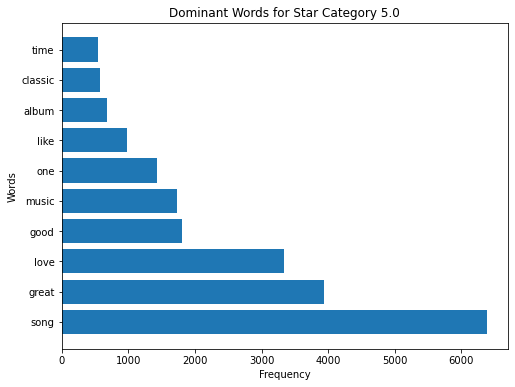

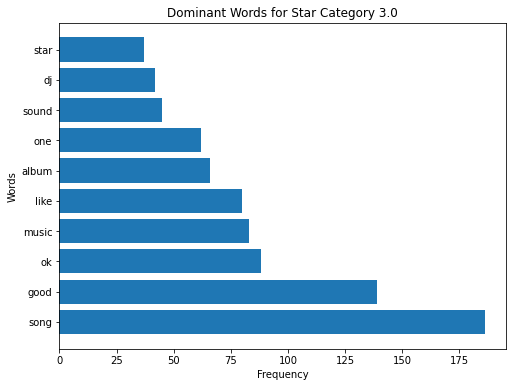

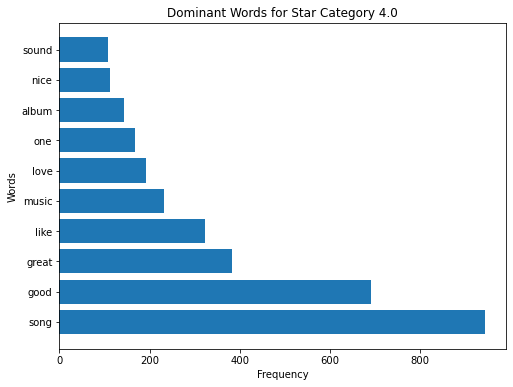

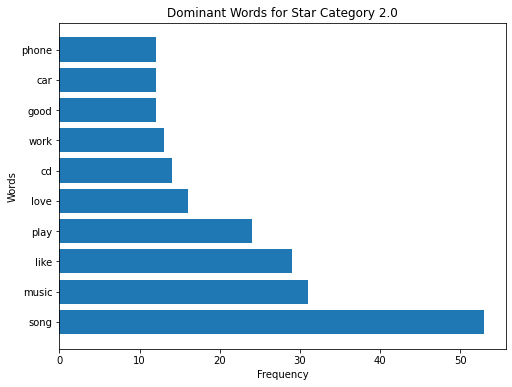

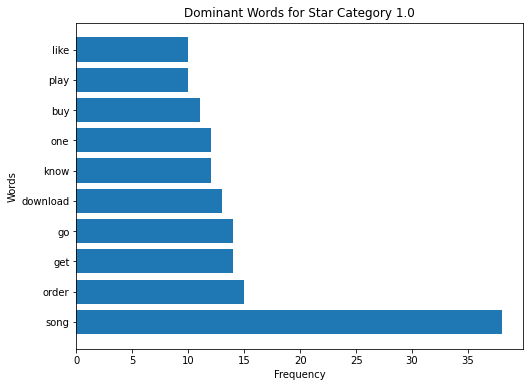

In [45]:
# Create a bar plot for each star rating category
for star_category, dominant_words in dominant_words_per_category.items():
    words = [word for word, _ in dominant_words]
    frequencies = [freq for _, freq in dominant_words]
    
    plt.figure(figsize=(8, 6))
    plt.barh(words, frequencies, align='center')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Dominant Words for Star Category {star_category}')
    plt.show()


Star Category: 5.0
Dominant Words: The dominant words in the reviews with a 5.0 star rating are 'song' (6379 occurrences), 'great' (3944 occurrences), 'love' (3341 occurrences), 'good' (1808 occurrences), 'music' (1725 occurrences), 'one' (1425 occurrences), 'like' (988 occurrences), 'album' (686 occurrences), 'classic' (572 occurrences), and 'time' (547 occurrences).

Star Category: 3.0
Dominant Words: In the reviews with a 3.0 star rating, the dominant words include 'song' (186 occurrences), 'good' (139 occurrences), 'ok' (88 occurrences), 'music' (83 occurrences), 'like' (80 occurrences), 'album' (66 occurrences), 'one' (62 occurrences), 'sound' (45 occurrences), 'dj' (42 occurrences), and 'star' (37 occurrences).

Star Category: 4.0
Dominant Words: The dominant words in the reviews with a 4.0 star rating are 'song' (943 occurrences), 'good' (692 occurrences), 'great' (382 occurrences), 'like' (322 occurrences), 'music' (231 occurrences), 'love' (192 occurrences), 'one' (168 occurrences), 'album' (144 occurrences), 'nice' (113 occurrences), and 'sound' (108 occurrences).

Star Category: 2.0
Dominant Words: The reviews with a 2.0 star rating feature dominant words such as 'song' (53 occurrences), 'music' (31 occurrences), 'like' (29 occurrences), 'play' (24 occurrences), 'love' (16 occurrences), 'cd' (14 occurrences), 'work' (13 occurrences), 'good' (12 occurrences), 'car' (12 occurrences), and 'phone' (12 occurrences).

Star Category: 1.0
Dominant Words: Lastly, in the reviews with a 1.0 star rating, the dominant words include 'song' (38 occurrences), 'order' (15 occurrences), 'get' (14 occurrences), 'go' (14 occurrences), 'download' (13 occurrences), 'know' (12 occurrences), 'one' (12 occurrences), 'buy' (11 occurrences), 'play' (10 occurrences), and 'like' (10 occurrences).
 
 Star ratings (5.0, 3.0, 4.0, 2.0, 1.0) were analyzed for dominant words in Amazon Digital Music product reviews. Words like 'song', 'great', 'love', and 'good' appeared frequently in positive reviews, while 'ok', 'sound', and 'dj' were found in neutral reviews. Negative reviews mentioned words like 'order', 'get', and 'download'. These insights help understand customer sentiment and align with the aim of analyzing sentiment in the review data.

**TF-IDF** (Term Frequency-Inverse Document Frequency) is important for text analysis as it calculates the importance of words in a document by considering their frequency in the document and their rarity across all documents.

**DTM** (Document-Term Matrix) is a matrix representation of the frequency of words in a collection of documents, where rows represent documents and columns represent words.

The code snippet uses the TfidfVectorizer from scikit-learn to calculate the TF-IDF matrix for the lemmatized text data. It then converts the matrix into a DataFrame and selects the top 5 words with the highest TF-IDF scores for each score category (overall rating) in the recent_data dataset. The resulting DataFrame, tfidf_grouped, displays the top words for each score category based on TF-IDF scores.

In [46]:
#TF-IDF  

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


# Reset the index of recent_data
recent_data = recent_data.reset_index(drop=True)

# Initialize the TfidfVectorizer with min_df and max_df
tfidf_vect = TfidfVectorizer(lowercase=False, max_df=0.75, min_df=0.01)

# Fit and transform the 'lemmatized_text' column
tfidf_matrix = tfidf_vect.fit_transform(recent_data['lemmatized_text'])

# Convert the matrix to a DataFrame
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vect.get_feature_names_out())

# Select top 5 words for each score based on TF-IDF
tfidf_grouped = pd.DataFrame()
for overall in recent_data['overall'].unique():
    subset = df_tfidf[recent_data['overall'] == overall]
    top_words = subset.sum().nlargest(5).index.tolist()
    tfidf_grouped[f'top_{overall}'] = top_words

print(tfidf_grouped)

  top_5.0 top_3.0 top_4.0 top_2.0   top_1.0
0    song      ok    good    song      song
1   great    good    song   music       get
2    love    song   great    play  download
3    good   music    like    like      like
4   music    like    love    good       buy


The output shows the top 5 words based on TF-IDF scores for each score category (overall rating) in the recent_data dataset.

- For the score category 5.0, the top words are 'song', 'great', 'love', 'good', and 'music'.
- For the score category 3.0, the top words are 'ok', 'good', 'song', 'music', and 'like'.
- For the score category 4.0, the top words are 'good', 'song', 'great', 'like', and 'music'.
- For the score category 2.0, the top words are 'song', 'music', 'like', 'play', and 'love'.
- For the score category 1.0, the top words are 'song', 'get', 'download', 'like', and 'buy'.

These top words provide insights into the important terms associated with each score category, indicating the key aspects that contribute to different overall ratings in the 'Digital Music' product reviews.

In [47]:
# Create DTM - Word Counts
count_vect = CountVectorizer()
dtm_counts = count_vect.fit_transform(recent_data['lemmatized_text'])
dtm_counts.shape

(16250, 7555)

In [48]:
# Create DTM - TF-IDF
dtm_tfidf = tfidf_vect.transform(recent_data['lemmatized_text'])

print(dtm_tfidf)

  (0, 72)	0.7491754048702021
  (0, 10)	0.6623716575590841
  (1, 35)	1.0
  (2, 40)	0.31974482589731756
  (2, 36)	0.3012866115999177
  (2, 33)	0.2768500034448967
  (2, 31)	0.3238240501822414
  (2, 27)	0.33641131268038205
  (2, 24)	0.33641131268038205
  (2, 15)	0.3300757891096238
  (2, 1)	0.5386896276555247
  (3, 58)	0.3689306813390661
  (3, 45)	0.27108280841172466
  (3, 41)	0.5517622924573659
  (3, 40)	0.5331567294761053
  (3, 1)	0.4491175099980405
  (4, 51)	0.3644126798246247
  (4, 12)	0.5518573127852792
  (4, 11)	0.5556043083309745
  (4, 10)	0.5039451931237221
  (5, 67)	0.8936954257804492
  (5, 45)	0.44867414226708174
  (6, 36)	1.0
  (7, 13)	1.0
  (8, 86)	0.39316421005844393
  :	:
  (16239, 46)	0.352880042511062
  (16239, 35)	0.19540070654945954
  (16239, 26)	0.6562767266277088
  (16239, 19)	0.34464132890044585
  (16240, 36)	1.0
  (16241, 45)	1.0
  (16242, 70)	0.30663019686082066
  (16242, 36)	0.38168426047447856
  (16242, 4)	0.871948993737102
  (16243, 70)	0.31964661502189595
  (16243

In [49]:
#Removing zero frequency features from the data
# Get feature names
feature_names = tfidf_vect.get_feature_names_out()

# Get non-zero features for each document
non_zero_features = [{feature_names[i] for i in row.indices} for row in tfidf_matrix]

# Convert lists of sets to lists of strings
non_zero_features_str = [' '.join(features) for features in non_zero_features]

# Add the column to your DataFrame
recent_data['retained_words'] = non_zero_features_str

recent_data.head(5)

,overall,verified,reviewTime,reviewerID,reviewText,summary,style_str,quarter_year,year,month,pos_tags,lemmatized_text,retained_words
0,5.0,True,2017-12-07,A1XL1WKRIGSTGE,elvis still best,five stars,"{""Format:"": "" Audio CD""}",2017Q4,2017,12,"[(elvis, NN), (still, RB), (best, JJS)]",elvis still best,still best
1,5.0,True,2018-03-19,A1RY96KKGQ84EE,michael good,five stars,"{""Format:"": "" Audio CD""}",2018Q1,2018,3,"[(michael, RB), (good, JJ)]",michael good,good
2,5.0,True,2018-01-17,A3HO0XCG4KZ16R,great album come michael jackson greatest hits...,great album it come with michael jackson great...,"{""Format:"": "" Audio CD""}",2018Q1,2018,1,"[(great, JJ), (album, JJ), (come, NN), (michae...",great album come michael jackson great hit hug...,album first get come great hit fan ever
3,5.0,True,2017-07-25,A3TM7P9GGJ6F4C,outstanding album hits love one hundred percent,five stars,"{""Format:"": "" Audio CD""}",2017Q3,2017,7,"[(outstanding, JJ), (album, NN), (hits, NNS), ...",outstanding album hit love one hundred percent,album love hit one hundred
4,3.0,True,2017-05-31,A2N6RNHQJ65T0F,since bought cd okay best music already,great if you don't have his music already,"{""Format:"": "" Audio CD""}",2017Q2,2017,5,"[(since, IN), (bought, VBN), (cd, NN), (okay, ...",since buy cd okay best music already,best music cd buy


The code in next cell calculates the sum of TF-IDF scores for each term across all documents in the tfidf_matrix. It then creates a DataFrame, tfidf_df, with the terms and their corresponding sum TF-IDF scores. The DataFrame is sorted in descending order based on the sum TF-IDF scores, and the top 10 terms with the highest scores are displayed.

In [50]:

# Get feature names
feature_names = tfidf_vect.get_feature_names_out()

# Sum tf-idf for each term through documents
sum_tfidf = tfidf_matrix.sum(axis=0)

# Connecting term to its sums tf-idf. Convert the matrix to a numpy array before flatten it to a 1D array.
data = zip(feature_names, np.asarray(sum_tfidf).ravel())

# Create a DataFrame from the data
tfidf_df = pd.DataFrame(data, columns=["Term", "Sum TF-IDF"])

# Sort by Sum TF-IDF
tfidf_df = tfidf_df.sort_values("Sum TF-IDF", ascending=False)

# Display top 10 terms with highest tf-idf scores
print(tfidf_df.head(10))


       Term   Sum TF-IDF
70     song  2741.154277
36    great  2364.087471
45     love  2134.128201
35     good  1602.889776
51    music   903.975947
43     like   699.373917
58      one   515.384255
5   awesome   432.542867
13  classic   405.572416
54     nice   343.443396


The term "song" has the highest sum TF-IDF score of 2741.154277, indicating its significance in the 'Digital Music' product reviews.
Other terms with high sum TF-IDF scores include "great" (2364.087471), "love" (2134.128201), "good" (1602.889776), and "music" (903.975947).
These terms reflect the importance of positive sentiments and positive aspects of music in the reviews.

Overall, the code and results provide insights into the terms that contribute the most to the TF-IDF scores, highlighting key words that are significant in the 'Digital Music' product reviews.

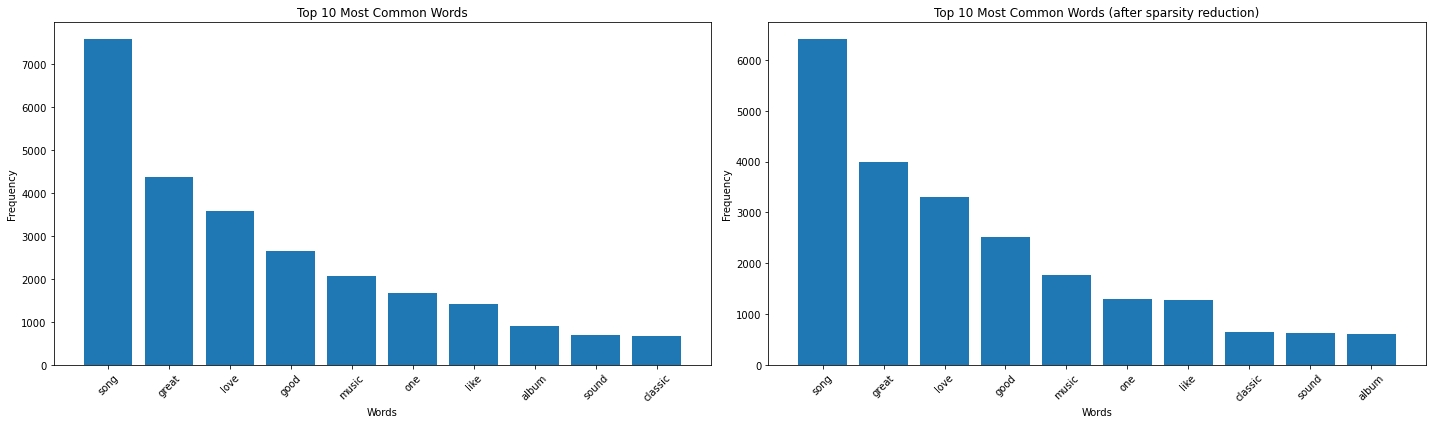

In [51]:
#Comparative One gram analysis
def get_freq_dict(texts, vectorizer):
    matrix = vectorizer.fit_transform(texts)
    features = vectorizer.get_feature_names_out()
    counts = matrix.sum(axis=0).A1
    freq_dict = dict(zip(features, counts))
    sorted_freq_dict = dict(sorted(freq_dict.items(), key=lambda item: item[1], reverse=True))
    return sorted_freq_dict

# Create the CountVectorizer for one-gram (unigrams)
one_gram_vectorizer = CountVectorizer(ngram_range=(1, 1))

# Get the frequency dictionaries
lemmatized_freq_dict = get_freq_dict(recent_data['lemmatized_text'], one_gram_vectorizer)
retained_freq_dict = get_freq_dict(recent_data['retained_words'], one_gram_vectorizer)

# Extract the top 10 most common words
top_10_common_words_lemmatized = list(lemmatized_freq_dict.items())[:10]
top_10_common_words_retained = list(retained_freq_dict.items())[:10]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Plotting the top 10 most common words for lemmatized_text
axs[0].bar([word for word, count in top_10_common_words_lemmatized], [count for word, count in top_10_common_words_lemmatized])
axs[0].set_xlabel('Words')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Top 10 Most Common Words')
axs[0].tick_params(axis='x', rotation=45)

# Plotting the top 10 most common words for retained_words
axs[1].bar([word for word, count in top_10_common_words_retained], [count for word, count in top_10_common_words_retained])
axs[1].set_xlabel('Words')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Top 10 Most Common Words (after sparsity reduction)')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


The identification of the top ten common words in the dataset provides insights into the most frequently occurring terms. In the given dataset, the following words are observed as the most common:

1. "song"
2. "great"
3. "love"
4. "good"
5. "music"
6. "one"
7. "like"
8. "album"
9. "sound"
10. "classic"

The presence of these common words in the digital music reviews indicates their high frequency and significant impact on sentiment analysis and topic modeling. Analyzing these words helps understand prevalent themes, sentiments, and customer preferences. "Song" emphasizes the importance of specific songs, while "great," "love," and "good" reflect positive sentiments. "Music," "sound," and "album" indicate attention to musical aspects. Overall, these words reveal key aspects mentioned by reviewers, such as song quality, positive sentiments, and the overall music experience. Understanding these common words provides insights into customer preferences and sentiments in digital music reviews.

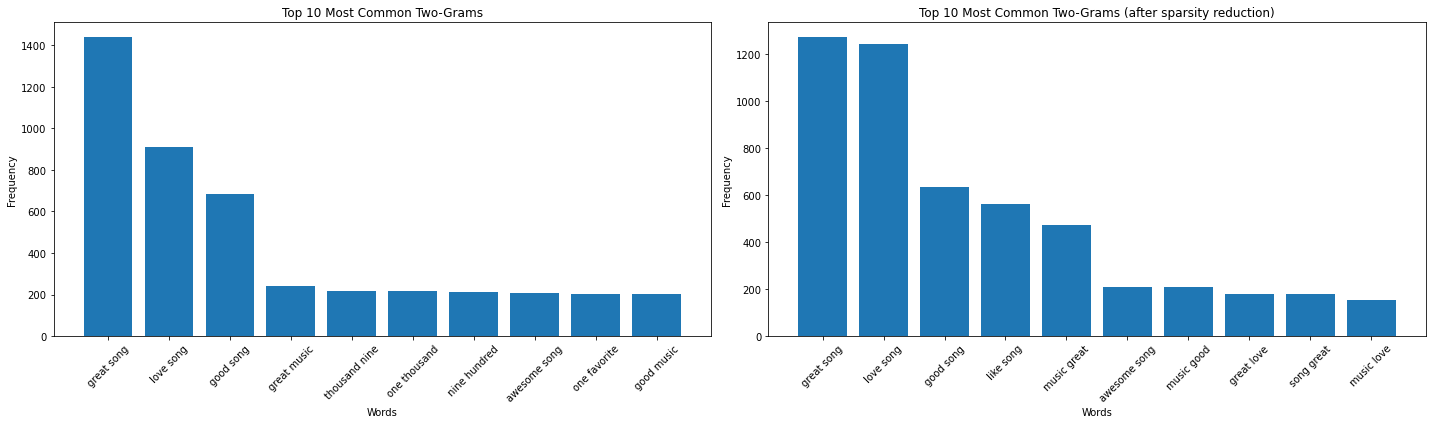

In [52]:
#Comparative bi-gram analysis

# Create the CountVectorizer for two-gram (bigrams)
two_gram_vectorizer = CountVectorizer(ngram_range=(2, 2))

# Get the frequency dictionaries
lemmatized_freq_dict = get_freq_dict(recent_data['lemmatized_text'], two_gram_vectorizer)
retained_freq_dict = get_freq_dict(recent_data['retained_words'], two_gram_vectorizer)

# Extract the top 10 most common words
top_10_common_words_lemmatized = list(lemmatized_freq_dict.items())[:10]
top_10_common_words_retained = list(retained_freq_dict.items())[:10]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Plotting the top 10 most common words for lemmatized_text
axs[0].bar([word for word, count in top_10_common_words_lemmatized], [count for word, count in top_10_common_words_lemmatized])
axs[0].set_xlabel('Words')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Top 10 Most Common Two-Grams')
axs[0].tick_params(axis='x', rotation=45)

# Plotting the top 10 most common words for retained_words
axs[1].bar([word for word, count in top_10_common_words_retained], [count for word, count in top_10_common_words_retained])
axs[1].set_xlabel('Words')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Top 10 Most Common Two-Grams (after sparsity reduction)')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


The two-gram words found in the dataset include "great song", "love song", "good song", "great music", "thousand nine", "one thousand", "nine hundread", "awesome song", "one favorite", "good music". These word combinations indicate commonly occurring phrases in the reviews, reflecting positive sentiments towards songs, preferences for favorites, and occasional occurrences of numeric references. Analyzing these phrases provides insights into reviewers' sentiments and preferences.

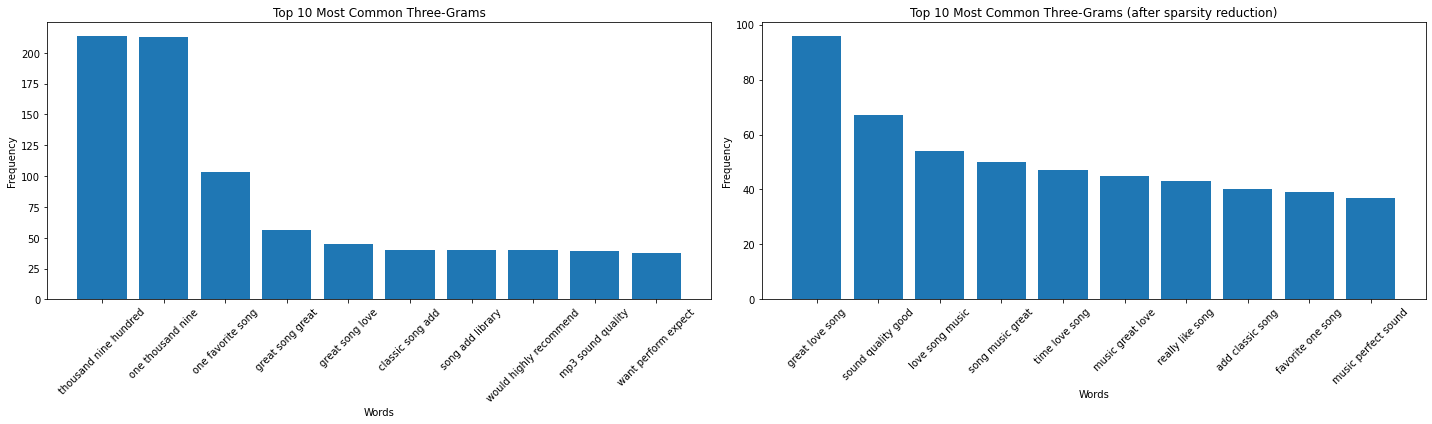

In [53]:
#Comparative tri-gram analysis

# Create the CountVectorizer for three-gram (trigrams)
three_gram_vectorizer = CountVectorizer(ngram_range=(3, 3))

# Get the frequency dictionaries
lemmatized_freq_dict = get_freq_dict(recent_data['lemmatized_text'], three_gram_vectorizer)
retained_freq_dict = get_freq_dict(recent_data['retained_words'], three_gram_vectorizer)

# Extract the top 10 most common words
top_10_common_words_lemmatized = list(lemmatized_freq_dict.items())[:10]
top_10_common_words_retained = list(retained_freq_dict.items())[:10]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Plotting the top 10 most common words for lemmatized_text
axs[0].bar([word for word, count in top_10_common_words_lemmatized], [count for word, count in top_10_common_words_lemmatized])
axs[0].set_xlabel('Words')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Top 10 Most Common Three-Grams')
axs[0].tick_params(axis='x', rotation=45)

# Plotting the top 10 most common words for retained_words
axs[1].bar([word for word, count in top_10_common_words_retained], [count for word, count in top_10_common_words_retained])
axs[1].set_xlabel('Words')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Top 10 Most Common Three-Grams (after sparsity reduction)')
axs[1].tick_params(axis='x', rotation=45)

# Show the plots
plt.tight_layout()
plt.show()


The code performs a comparative analysis of trigrams (three-gram combinations of words) before and after sparsity reduction. 

Before sparsity reduction, the top 10 most common trigrams include phrases like "thousand nine hundred," "one thousand nine," "great song great," "classic song add," and "mp3 sound quality." 

After sparsity reduction, the top 10 most common trigrams consist of phrases such as "thousand nine one," "great song love," "good quality music," "one song favorite," and "music perfect sound."

This analysis provides insights into the frequently occurring combinations of words within the reviews, both before and after sparsity reduction, showcasing the key trigrams that contribute to the overall sentiment and themes in the reviews.

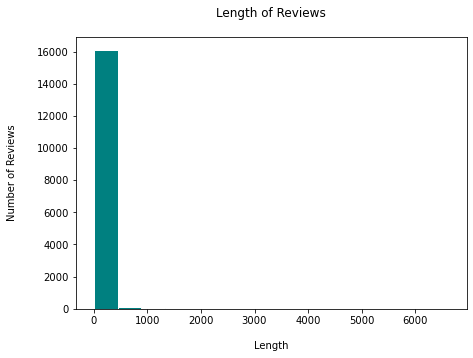

In [54]:
# Length of Reviews
recent_data["len_review"] = recent_data["lemmatized_text"].astype(str).apply(len)
recent_data["len_review"].plot(kind = "hist", bins = 15, linewidth = 1, color = "teal", figsize = (7,5), edgecolor="white")
plt.title("Length of Reviews", pad = 20)
plt.xlabel("Length", labelpad = 15)
plt.ylabel("Number of Reviews", labelpad=20)
plt.show()

The code analyzes the length of each review by counting the number of characters. It reveals that the majority of reviews have fewer than 500 characters. Additionally, the word count of the reviews is visualized. 

The analysis provides insights into the length and word count distribution of the reviews, highlighting the typical length of customer feedback.

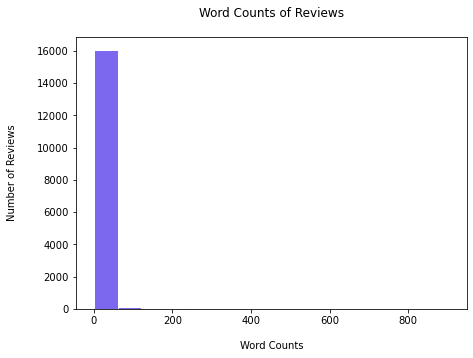

In [55]:
#Number of words in each review
recent_data["word_count"] = recent_data["lemmatized_text"].apply(lambda x: len(str(x).split()))
recent_data["word_count"].plot(kind = "hist", bins = 15, linewidth = 1, color = "MediumSlateBlue", figsize = (7,5), edgecolor="white")
plt.title("Word Counts of Reviews", pad = 20)
plt.xlabel("Word Counts", labelpad = 15)
plt.ylabel("Number of Reviews", labelpad=20)
plt.show()

The code counts the number of words in each review and creates a plot to visualize the distribution. The majority of the reviews had a word count ranging from 0 to 100 words. To investigate the outliers, box plots were used.

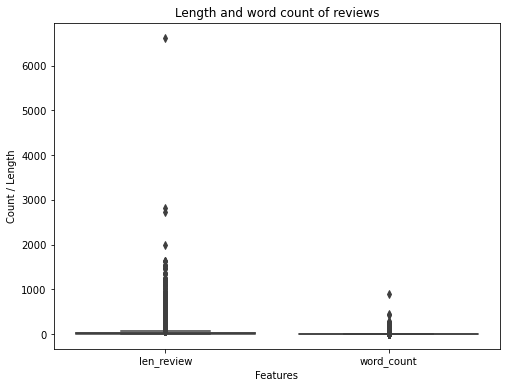

In [56]:
#Boxplot of word counts and length
plt.figure(figsize=(8, 6))
sns.boxplot(data=recent_data[['len_review', 'word_count']])
plt.title("Length and word count of reviews")
plt.xlabel("Features")
plt.ylabel("Count / Length")
plt.show()

The code recent_data = recent_data[recent_data["word_count"] <= 20] filters the DataFrame recent_data to include only rows where the value in the "word_count" column is less than or equal to 20. This is done to remove reviews that have a word count exceeding 20, effectively removing outliers or unusually long reviews from the dataset. The resulting DataFrame, stored in the variable recent_data, will only contain reviews with a word count of 20 or less

In [57]:
# Recent data frame with review without outliers
recent_data = recent_data[recent_data["word_count"] <= 20]
recent_data.head()

,overall,verified,reviewTime,reviewerID,reviewText,summary,style_str,quarter_year,year,month,pos_tags,lemmatized_text,retained_words,len_review,word_count
0,5.0,True,2017-12-07,A1XL1WKRIGSTGE,elvis still best,five stars,"{""Format:"": "" Audio CD""}",2017Q4,2017,12,"[(elvis, NN), (still, RB), (best, JJS)]",elvis still best,still best,16,3
1,5.0,True,2018-03-19,A1RY96KKGQ84EE,michael good,five stars,"{""Format:"": "" Audio CD""}",2018Q1,2018,3,"[(michael, RB), (good, JJ)]",michael good,good,12,2
2,5.0,True,2018-01-17,A3HO0XCG4KZ16R,great album come michael jackson greatest hits...,great album it come with michael jackson great...,"{""Format:"": "" Audio CD""}",2018Q1,2018,1,"[(great, JJ), (album, JJ), (come, NN), (michae...",great album come michael jackson great hit hug...,album first get come great hit fan ever,95,16
3,5.0,True,2017-07-25,A3TM7P9GGJ6F4C,outstanding album hits love one hundred percent,five stars,"{""Format:"": "" Audio CD""}",2017Q3,2017,7,"[(outstanding, JJ), (album, NN), (hits, NNS), ...",outstanding album hit love one hundred percent,album love hit one hundred,46,7
4,3.0,True,2017-05-31,A2N6RNHQJ65T0F,since bought cd okay best music already,great if you don't have his music already,"{""Format:"": "" Audio CD""}",2017Q2,2017,5,"[(since, IN), (bought, VBN), (cd, NN), (okay, ...",since buy cd okay best music already,best music cd buy,36,7


In [58]:
# Print summary statistics
wc_summary = recent_data['word_count'].describe()
print("Word Count Statistics:")
print(wc_summary)

# Print summary statistics
len_summary = recent_data['len_review'].describe()
print("Length Statistics:")
print(len_summary)

#Print summary statistics
rating_summary = recent_data['overall'].describe()
print("Summary of Rating:")
print(rating_summary)

Word Count Statistics:
count    15379.000000
mean         3.728786
std          3.603583
min          0.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         20.000000
Name: word_count, dtype: float64
Length Statistics:
count    15379.000000
mean        21.566162
std         22.613738
min          0.000000
25%          8.000000
50%         13.000000
75%         27.000000
max        142.000000
Name: len_review, dtype: float64
Summary of Rating:
count    15379.000000
mean         4.751609
std          0.620935
min          1.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: overall, dtype: float64


In [59]:
# The number of null values in each column
print(recent_data.isna().sum())


overall            0
verified           0
reviewTime         0
reviewerID         0
reviewText         0
summary            0
style_str          0
quarter_year       0
year               0
month              0
pos_tags           0
lemmatized_text    0
retained_words     0
len_review         0
word_count         0
dtype: int64


# Sentiment Analysis (before sparsity reduction)

- **Vader lexicon**: The Vader lexicon is important for sentiment analysis as it provides a pre-trained model specifically designed for social media text, capturing both polarity and intensity of sentiments.

- **Afinn lexicon**: The Afinn lexicon is important as it offers a list of pre-computed sentiment scores for English words, allowing for quick and simple sentiment analysis based on word-level polarity.

- **SentiWordNet lexicon**: The SentiWordNet lexicon is important as it assigns sentiment scores to synsets (sets of synonymous words) in WordNet, enabling more nuanced sentiment analysis based on the semantic context of words.


In [60]:
# Sentiment analysis using Vader lexicon

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(text):
    sentiment_dict = sia.polarity_scores(text)
    return sentiment_dict['compound']  # returning compound score

# Apply the function on 'lemmatized_text' column
recent_data['vader_sentiment_score'] = recent_data['lemmatized_text'].apply(get_sentiment_score)

# You can classify reviews into positive, neutral and negative based on sentiment score
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

recent_data['vader_sentiment_label'] = recent_data['vader_sentiment_score'].apply(classify_sentiment)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [61]:
# Sentiment analysis using AFINN-111 and SentiWordNet lexicon
from nltk.corpus import sentiwordnet as swn
from afinn import Afinn

# Initialize the AFINN-111 lexicon
afinn = Afinn()

# Function to get sentiment score and label using AFINN-111 lexicon
def get_afinn_sentiment(text):
    sentiment_score = afinn.score(text)
    if sentiment_score > 0:
        sentiment_label = 'Positive'
    elif sentiment_score < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    return sentiment_score, sentiment_label

# Function to get sentiment score and label using SentiWordNet lexicon
def get_sentiwordnet_sentiment(text):
    sentiment_score = 0.0
    word_count = 0
    
    # Iterate over each word in the text
    for word in text.split():
        synsets = list(swn.senti_synsets(word))
        
        # Check if the word has any synsets in SentiWordNet
        if synsets:
            sentiment_score += synsets[0].pos_score() - synsets[0].neg_score()
            word_count += 1
    
    # Calculate the average sentiment score
    if word_count > 0:
        sentiment_score /= word_count
    
    # Determine the sentiment label based on the score
    if sentiment_score > 0:
        sentiment_label = 'Positive'
    elif sentiment_score < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    
    return sentiment_score, sentiment_label

# Apply the functions on the 'lemmatized_text' column
recent_data['afinn_sentiment_score'], recent_data['afinn_sentiment_label'] = zip(*recent_data['lemmatized_text'].apply(get_afinn_sentiment))
recent_data['sentiwordnet_sentiment_score'], recent_data['sentiwordnet_sentiment_label'] = zip(*recent_data['lemmatized_text'].apply(get_sentiwordnet_sentiment))

In [62]:
from textblob import TextBlob

# Function to find the polarity
def find_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply the function on the 'lemmatized_text' column
recent_data['polarity'] = recent_data['lemmatized_text'].apply(find_polarity)

In [63]:
# Function to assign sentiment category based on polarity score
def assign_sentiment(polarity_score):
    if polarity_score > 0:
        return 'Positive'
    elif polarity_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the 'polarity' column to create a new 'polarity_label' column
recent_data['polarity_label'] = recent_data['polarity'].apply(assign_sentiment)


Comaprision: The sentiment scores from VADER, AFINN-111, and SentiWordNet are on different scales, and a score of, say, 0.5 might mean different things for each of them. By normalizing the scores, you put them on a common scale, which can make comparisons more meaningful.

In [64]:
# Normalizing the scores
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

# List of sentiment scores
sentiment_scores = ['vader_sentiment_score', 'afinn_sentiment_score', 'sentiwordnet_sentiment_score', 'polarity']

# Normalize sentiment scores
recent_data[sentiment_scores] = min_max_scaler.fit_transform(recent_data[sentiment_scores])


In [65]:
recent_data.head()

,overall,verified,reviewTime,reviewerID,reviewText,summary,style_str,quarter_year,year,month,...,len_review,word_count,vader_sentiment_score,vader_sentiment_label,afinn_sentiment_score,afinn_sentiment_label,sentiwordnet_sentiment_score,sentiwordnet_sentiment_label,polarity,polarity_label
0,5.0,True,2017-12-07,A1XL1WKRIGSTGE,elvis still best,five stars,"{""Format:"": "" Audio CD""}",2017Q4,2017,12,...,16,3,0.817824,Positive,0.333333,Positive,0.541667,Positive,1.00000,Positive
1,5.0,True,2018-03-19,A1RY96KKGQ84EE,michael good,five stars,"{""Format:"": "" Audio CD""}",2018Q1,2018,3,...,12,2,0.714810,Positive,0.333333,Positive,0.625000,Positive,0.85000,Positive
2,5.0,True,2018-01-17,A3HO0XCG4KZ16R,great album come michael jackson greatest hits...,great album it come with michael jackson great...,"{""Format:"": "" Audio CD""}",2018Q1,2018,1,...,95,16,0.973421,Positive,0.600000,Positive,0.515625,Positive,0.78125,Positive
3,5.0,True,2017-07-25,A3TM7P9GGJ6F4C,outstanding album hits love one hundred percent,five stars,"{""Format:"": "" Audio CD""}",2017Q3,2017,7,...,46,7,0.928545,Positive,0.500000,Positive,0.598214,Positive,0.75000,Positive
4,3.0,True,2017-05-31,A2N6RNHQJ65T0F,since bought cd okay best music already,great if you don't have his music already,"{""Format:"": "" Audio CD""}",2017Q2,2017,5,...,36,7,0.865007,Positive,0.333333,Positive,0.572917,Positive,0.87500,Positive


In [66]:
# Sentiment analysis using Vader lexicon for summary 


# Function to get sentiment score
def get_sentiment_score(text):
    sentiment_dict = sia.polarity_scores(text)
    return sentiment_dict['compound']  # returning compound score

# Apply the function on 'summary' column
recent_data['vscore_sum_senti'] = recent_data['summary'].apply(get_sentiment_score)

# You can classify reviews into positive, neutral and negative based on sentiment score
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

recent_data['vscore_sum_senti_label'] = recent_data['vscore_sum_senti'].apply(classify_sentiment)


In [67]:
recent_data.head()

,overall,verified,reviewTime,reviewerID,reviewText,summary,style_str,quarter_year,year,month,...,vader_sentiment_score,vader_sentiment_label,afinn_sentiment_score,afinn_sentiment_label,sentiwordnet_sentiment_score,sentiwordnet_sentiment_label,polarity,polarity_label,vscore_sum_senti,vscore_sum_senti_label
0,5.0,True,2017-12-07,A1XL1WKRIGSTGE,elvis still best,five stars,"{""Format:"": "" Audio CD""}",2017Q4,2017,12,...,0.817824,Positive,0.333333,Positive,0.541667,Positive,1.00000,Positive,0.0000,Neutral
1,5.0,True,2018-03-19,A1RY96KKGQ84EE,michael good,five stars,"{""Format:"": "" Audio CD""}",2018Q1,2018,3,...,0.714810,Positive,0.333333,Positive,0.625000,Positive,0.85000,Positive,0.0000,Neutral
2,5.0,True,2018-01-17,A3HO0XCG4KZ16R,great album come michael jackson greatest hits...,great album it come with michael jackson great...,"{""Format:"": "" Audio CD""}",2018Q1,2018,1,...,0.973421,Positive,0.600000,Positive,0.515625,Positive,0.78125,Positive,0.8519,Positive
3,5.0,True,2017-07-25,A3TM7P9GGJ6F4C,outstanding album hits love one hundred percent,five stars,"{""Format:"": "" Audio CD""}",2017Q3,2017,7,...,0.928545,Positive,0.500000,Positive,0.598214,Positive,0.75000,Positive,0.0000,Neutral
4,3.0,True,2017-05-31,A2N6RNHQJ65T0F,since bought cd okay best music already,great if you don't have his music already,"{""Format:"": "" Audio CD""}",2017Q2,2017,5,...,0.865007,Positive,0.333333,Positive,0.572917,Positive,0.87500,Positive,0.6249,Positive


In [68]:
#Counting Sentiment type for overall sample 
positive_count_vader = recent_data['vader_sentiment_label'].value_counts()['Positive']
negative_count_vader = recent_data['vader_sentiment_label'].value_counts()['Negative']
neutral_count_vader = recent_data['vader_sentiment_label'].value_counts()['Neutral']

positive_count_afinn = recent_data['afinn_sentiment_label'].value_counts()['Positive']
negative_count_afinn = recent_data['afinn_sentiment_label'].value_counts()['Negative']
neutral_count_afinn = recent_data['afinn_sentiment_label'].value_counts()['Neutral']

positive_count_sentiwordnet = recent_data['sentiwordnet_sentiment_label'].value_counts()['Positive']
negative_count_sentiwordnet = recent_data['sentiwordnet_sentiment_label'].value_counts()['Negative']
neutral_count_sentiwordnet = recent_data['sentiwordnet_sentiment_label'].value_counts()['Neutral']

positive_count_polarity = recent_data['polarity_label'].value_counts()['Positive']
negative_count_polarity = recent_data['polarity_label'].value_counts()['Negative']
neutral_count_polarity = recent_data['polarity_label'].value_counts()['Neutral']

positive_count_summary = recent_data['vscore_sum_senti_label'].value_counts()['Positive']
negative_count_summary = recent_data['vscore_sum_senti_label'].value_counts()['Negative']
neutral_count_summary = recent_data['vscore_sum_senti_label'].value_counts()['Neutral']

# Create a dictionary of the counts
data = {
    'Sentiment': ['Positive', 'Negative', 'Neutral'],
    'VADER': [positive_count_vader, negative_count_vader, neutral_count_vader],
    'AFINN': [positive_count_afinn, negative_count_afinn, neutral_count_afinn],
    'SentiWordNet': [positive_count_sentiwordnet, negative_count_sentiwordnet, neutral_count_sentiwordnet],
    'Polarity': [positive_count_polarity, negative_count_polarity, neutral_count_polarity],
    'Summary_text': [positive_count_summary, negative_count_summary,neutral_count_summary ]
}

# Create the dataframe
sentiment_counts_df = pd.DataFrame(data)

# Set 'Sentiment' column as index
sentiment_counts_df.set_index('Sentiment', inplace=True)

In [69]:
sentiment_counts_df

,VADER,AFINN,SentiWordNet,Polarity,Summary_text
Sentiment,,,,,
Positive,13170,12784,9820,12674,3831
Negative,298,253,951,272,209
Neutral,1911,2342,4608,2433,11339


In [ ]:
-VADER: Out of the total reviews, 13,170 were classified as positive sentiment using the VADER lexicon.

-AFINN: The AFINN lexicon identified 12,784 reviews as positive sentiment.

-SentiWordNet: Based on SentiWordNet, 9,820 reviews were classified as positive sentiment.
    
-Polarity: Using a polarity measure, 12,674 reviews were determined to have positive sentiment.

-Summary_text: Among the sentiment categories, there were 3831 positive, 298 negative, and 1911 neutral reviews.


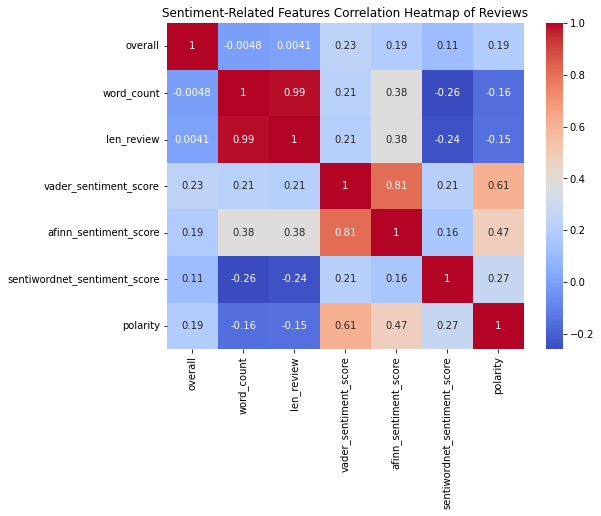

In [70]:
#To create heatmap and identify relationship between length of reviews word count and obtained sentiment

#Create a corr_data for selected columns
corr_data = recent_data[['overall', 'word_count', 'len_review', 'vader_sentiment_score', 'afinn_sentiment_score', 'sentiwordnet_sentiment_score', 'polarity']]

# Calculate the correlation matrix
corr_matrix = corr_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Sentiment-Related Features Correlation Heatmap of Reviews")
plt.show()

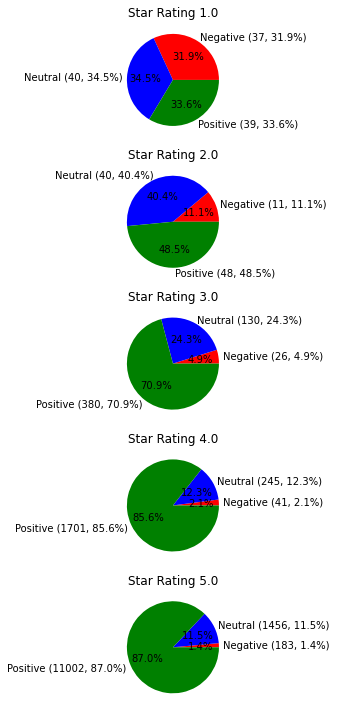

In [71]:
# Group the data by star rating and sentiment, and calculate the counts
sentiment_counts = recent_data.groupby(['overall', 'vader_sentiment_label']).size().unstack()

# Define the color scheme
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(sentiment_counts.index), ncols=1, figsize=(10, 10))  # Adjust the figsize as desired

# Iterate over each star rating and create a pie chart in each subplot
for i, rating in enumerate(sentiment_counts.index):
    ax = axes[i]
    counts = sentiment_counts.loc[rating]
    total_count = counts.sum()
    percentages = counts / total_count * 100
    labels = [f'{sentiment} ({count}, {percentage:.1f}%)' for sentiment, count, percentage in zip(counts.index, counts, percentages)]
    ax.pie(counts, labels=labels, colors=[colors[sentiment] for sentiment in counts.index], autopct='%1.1f%%')
    ax.set_title(f'Star Rating {rating}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

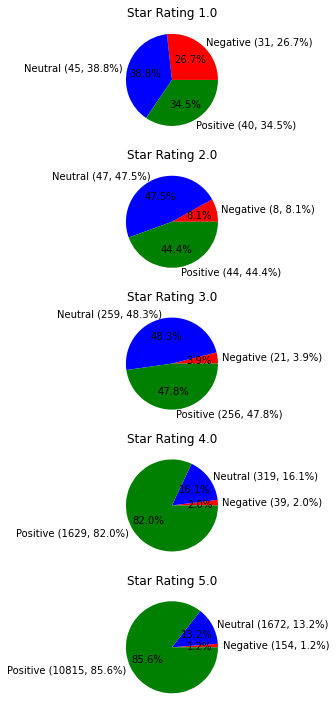

In [72]:
# Group the data by star rating and sentiment, and calculate the counts
sentiment_counts = recent_data.groupby(['overall', 'afinn_sentiment_label']).size().unstack()

# Define the color scheme
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(sentiment_counts.index), ncols=1, figsize=(10, 10))  # Adjust the figsize as desired

# Iterate over each star rating and create a pie chart in each subplot
for i, rating in enumerate(sentiment_counts.index):
    ax = axes[i]
    counts = sentiment_counts.loc[rating]
    total_count = counts.sum()
    percentages = counts / total_count * 100
    labels = [f'{sentiment} ({count}, {percentage:.1f}%)' for sentiment, count, percentage in zip(counts.index, counts, percentages)]
    ax.pie(counts, labels=labels, colors=[colors[sentiment] for sentiment in counts.index], autopct='%1.1f%%')
    ax.set_title(f'Star Rating {rating}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

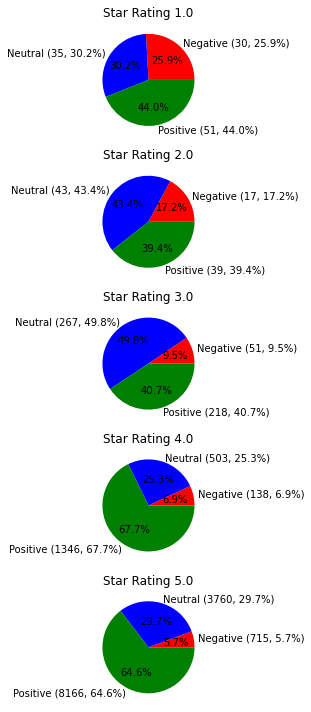

In [73]:
# Group the data by star rating and sentiment, and calculate the counts
sentiment_counts = recent_data.groupby(['overall', 'sentiwordnet_sentiment_label']).size().unstack()

# Define the color scheme
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(sentiment_counts.index), ncols=1, figsize=(10, 10))  # Adjust the figsize as desired

# Iterate over each star rating and create a pie chart in each subplot
for i, rating in enumerate(sentiment_counts.index):
    ax = axes[i]
    counts = sentiment_counts.loc[rating]
    total_count = counts.sum()
    percentages = counts / total_count * 100
    labels = [f'{sentiment} ({count}, {percentage:.1f}%)' for sentiment, count, percentage in zip(counts.index, counts, percentages)]
    ax.pie(counts, labels=labels, colors=[colors[sentiment] for sentiment in counts.index], autopct='%1.1f%%')
    ax.set_title(f'Star Rating {rating}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

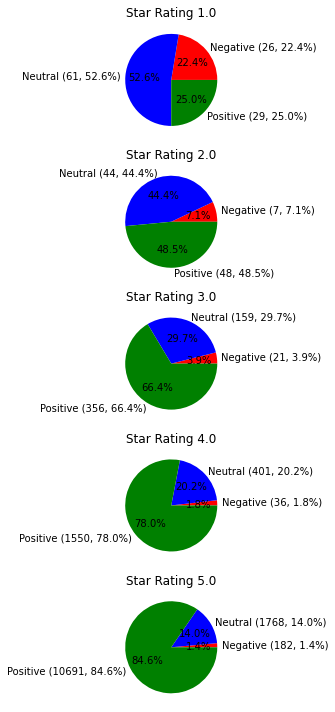

In [74]:
# Group the data by star rating and sentiment, and calculate the counts
sentiment_counts = recent_data.groupby(['overall', 'polarity_label']).size().unstack()

# Define the color scheme
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(sentiment_counts.index), ncols=1, figsize=(10, 10))  # Adjust the figsize as desired

# Iterate over each star rating and create a pie chart in each subplot
for i, rating in enumerate(sentiment_counts.index):
    ax = axes[i]
    counts = sentiment_counts.loc[rating]
    total_count = counts.sum()
    percentages = counts / total_count * 100
    labels = [f'{sentiment} ({count}, {percentage:.1f}%)' for sentiment, count, percentage in zip(counts.index, counts, percentages)]
    ax.pie(counts, labels=labels, colors=[colors[sentiment] for sentiment in counts.index], autopct='%1.1f%%')
    ax.set_title(f'Star Rating {rating}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

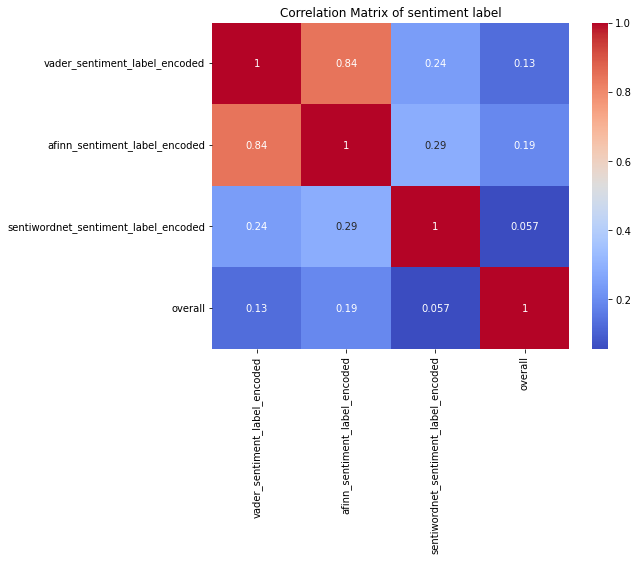

In [75]:
# Define a mapping function to assign numerical values to sentiment labels
def map_sentiment_label(label):
    if label == 'Positive':
        return 2
    elif label == 'Neutral':
        return 0
    elif label == 'Negative':
        return 1

# Apply the mapping function to the label columns
recent_data['vader_sentiment_label_encoded'] = recent_data['vader_sentiment_label'].map(map_sentiment_label)
recent_data['afinn_sentiment_label_encoded'] = recent_data['afinn_sentiment_label'].map(map_sentiment_label)
recent_data['sentiwordnet_sentiment_label_encoded'] = recent_data['sentiwordnet_sentiment_label'].map(map_sentiment_label)

# Calculate the correlation between the encoded label columns
correlation_matrix = recent_data[['vader_sentiment_label_encoded', 'afinn_sentiment_label_encoded', 'sentiwordnet_sentiment_label_encoded', 'overall']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of sentiment label')
plt.show()

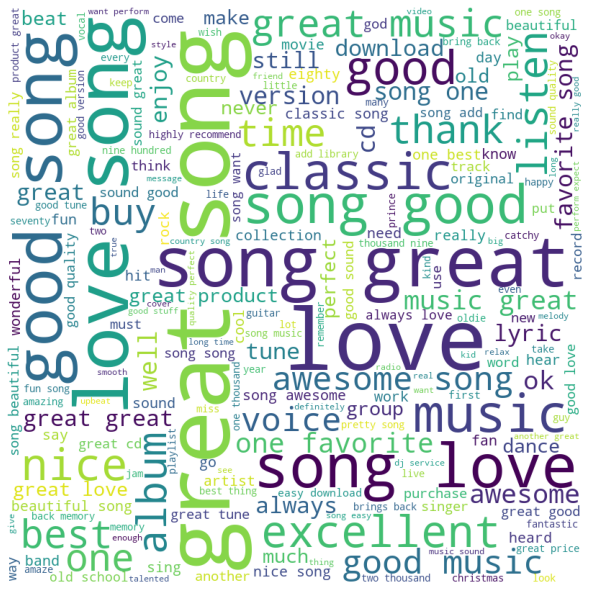

In [76]:
# Join all the reviews in the 'lemmatized_text' column into one big text
text = ' '.join(recent_data['lemmatized_text'])

# Generate the word cloud from the text

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

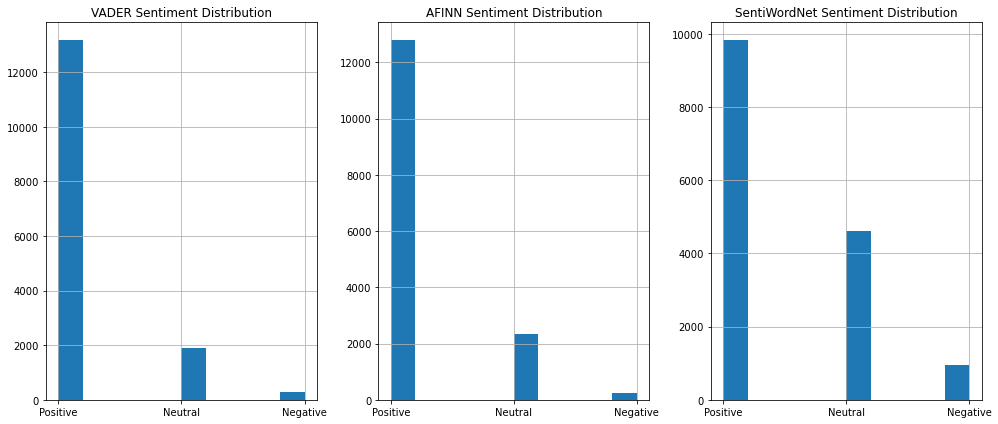

In [77]:
import matplotlib.pyplot as plt

# Assuming that sentiment scores are stored as pandas Series objects
plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
recent_data['vader_sentiment_label'].hist()
plt.title('VADER Sentiment Distribution')

plt.subplot(1,3,2)
recent_data['afinn_sentiment_label'].hist()
plt.title('AFINN Sentiment Distribution')

plt.subplot(1,3,3)
recent_data['sentiwordnet_sentiment_label'].hist()
plt.title('SentiWordNet Sentiment Distribution')

plt.tight_layout()
plt.show()

In [78]:
analyser = SentimentIntensityAnalyzer()
from nltk.corpus import sentiwordnet as swn
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wn.ADJ
    elif treebank_tag.startswith('V'):
        return wn.VERB
    elif treebank_tag.startswith('N'):
        return wn.NOUN
    elif treebank_tag.startswith('R'):
        return wn.ADV
    else:
        return ''

def get_sentiwordnet_score(text):
    sentiment = 0.0
    tokens_count = 0

    tagged_text = pos_tag(word_tokenize(text))

    for word, tag in tagged_text:
        wn_tag = get_wordnet_pos(tag)
        if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
            continue

        lemma = word
        synsets = wn.synsets(lemma, pos=wn_tag)
        if not synsets:
            continue

        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())

        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1

    if not tokens_count:
        return 0

    if sentiment >= 0:
        return 1

    return -1

In [79]:
sample_texts = ["I love this product!", "This is terrible", "It's okay, could be better", "This is the best thing ever!", "I really dislike this"]

for text in sample_texts:
    print(f'Text: {text}')
    print(f'VADER sentiment: {analyser.polarity_scores(text)["compound"]}') # assuming you have an instance of Vader analyser
    print(f'AFINN sentiment: {afinn.score(text)}') # assuming you have an instance of Afinn
    print(f'SentiWordNet sentiment: {get_sentiwordnet_score(text)}') # you'd need to implement or use existing function to get SentiWordNet score
    print('---')

Text: I love this product!
VADER sentiment: 0.6696
AFINN sentiment: 3.0
SentiWordNet sentiment: 1
---
Text: This is terrible
VADER sentiment: -0.4767
AFINN sentiment: -3.0
SentiWordNet sentiment: -1
---
Text: It's okay, could be better
VADER sentiment: 0.5859
AFINN sentiment: 2.0
SentiWordNet sentiment: 1
---
Text: This is the best thing ever!
VADER sentiment: 0.6696
AFINN sentiment: 3.0
SentiWordNet sentiment: 1
---
Text: I really dislike this
VADER sentiment: -0.4391
AFINN sentiment: -2.0
SentiWordNet sentiment: 1
---


## Feature Importance from Models

In [80]:
# Convert sentiment labels to numerical values
sentiment_mapping = {
    'Positive': 2,
    'Neutral': 0,
    'Negative': 1
}
recent_data['vader_sentiment_label'] = recent_data['vader_sentiment_label'].map(sentiment_mapping)
recent_data['afinn_sentiment_label'] = recent_data['afinn_sentiment_label'].map(sentiment_mapping)
recent_data['sentiwordnet_sentiment_label'] = recent_data['sentiwordnet_sentiment_label'].map(sentiment_mapping)



In [81]:
recent_data.head()

,overall,verified,reviewTime,reviewerID,reviewText,summary,style_str,quarter_year,year,month,...,afinn_sentiment_label,sentiwordnet_sentiment_score,sentiwordnet_sentiment_label,polarity,polarity_label,vscore_sum_senti,vscore_sum_senti_label,vader_sentiment_label_encoded,afinn_sentiment_label_encoded,sentiwordnet_sentiment_label_encoded
0,5.0,True,2017-12-07,A1XL1WKRIGSTGE,elvis still best,five stars,"{""Format:"": "" Audio CD""}",2017Q4,2017,12,...,2,0.541667,2,1.00000,Positive,0.0000,Neutral,2,2,2
1,5.0,True,2018-03-19,A1RY96KKGQ84EE,michael good,five stars,"{""Format:"": "" Audio CD""}",2018Q1,2018,3,...,2,0.625000,2,0.85000,Positive,0.0000,Neutral,2,2,2
2,5.0,True,2018-01-17,A3HO0XCG4KZ16R,great album come michael jackson greatest hits...,great album it come with michael jackson great...,"{""Format:"": "" Audio CD""}",2018Q1,2018,1,...,2,0.515625,2,0.78125,Positive,0.8519,Positive,2,2,2
3,5.0,True,2017-07-25,A3TM7P9GGJ6F4C,outstanding album hits love one hundred percent,five stars,"{""Format:"": "" Audio CD""}",2017Q3,2017,7,...,2,0.598214,2,0.75000,Positive,0.0000,Neutral,2,2,2
4,3.0,True,2017-05-31,A2N6RNHQJ65T0F,since bought cd okay best music already,great if you don't have his music already,"{""Format:"": "" Audio CD""}",2017Q2,2017,5,...,2,0.572917,2,0.87500,Positive,0.6249,Positive,2,2,2


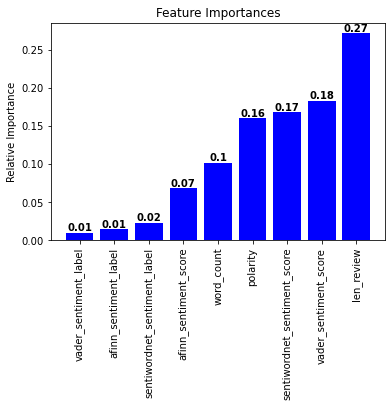

In [82]:
from sklearn.ensemble import RandomForestClassifier

# Target variable
y_F = recent_data['overall']

# Feature matrix
x_F = recent_data[['len_review', 'word_count', 'vader_sentiment_score', 'vader_sentiment_label', 'afinn_sentiment_score', 'afinn_sentiment_label', 'sentiwordnet_sentiment_score', 'sentiwordnet_sentiment_label', 'polarity']]

# Initialize a random forest classifier
clf = RandomForestClassifier()

# Assume X is your feature data and y is your target variable 
clf.fit(x_F, y_F)

# Get the feature importances
importances = clf.feature_importances_

# Now let's print the feature importances in descending order
features = x_F.columns
indices = np.argsort(importances)

# Create a bar chart
plt.bar(range(len(indices)), importances[indices], color='b', align='center')

# Y ticks
plt.xticks(range(len(indices)), [features[i] for i in indices], rotation='vertical')

# X label
plt.ylabel('Relative Importance')

# Title
plt.title('Feature Importances')

# Add importance values on top of the bars
for i, imp in zip(range(len(indices)), importances[indices]):
    plt.text(i, imp, str(round(imp, 2)), ha = 'center', va = 'bottom', color = 'black', fontweight = 'bold')

plt.show()


It is plot of text-derived features against the target variable rating. It is evident that the Length of review (0.27) and VADER sentiment score (0.18) are important factors in predicting rating. However, other lexicons perform nearly equally. But as decided all models were run on VADER given the literature suggestions that VADER has higher accuracy in social media text. 

The following libraries are used in the study: 

- `sklearn`: Provides a wide range of machine learning algorithms and tools for data analysis and model training.

- `train_test_split`: Splits the dataset into training and testing subsets for model evaluation.

- `LinearRegression`: Implements linear regression, a commonly used algorithm for regression analysis.

- `Ridge`: Implements ridge regression, a variant of linear regression that helps prevent overfitting.

- `SVR`: Implements support vector regression, a regression algorithm based on support vector machines.

- `DecisionTreeRegressor`: Implements decision tree regression, which uses a tree-like model to make predictions.

- `mean_squared_error`: Computes the mean squared error, a metric for evaluating regression models.

- `r2_score`: Calculates the coefficient of determination, a measure of how well the regression model fits the data.

- `RandomForestRegressor`: Implements random forest regression, an ensemble method using multiple decision trees.

- `GradientBoostingRegressor`: Implements gradient boosting regression, another ensemble method that builds models sequentially.

- `LogisticAT`: Implements the ordinal logistic regression model for ordinal classification tasks.

- `LabelEncoder`: Encodes categorical labels into numerical values for model training.

- `imbalanced-learn`: Provides techniques for handling imbalanced datasets, addressing issues with class imbalance.

- `SMOTEENN`: Combines Synthetic Minority Over-sampling Technique (SMOTE) and Edited Nearest Neighbors (ENN) to address imbalanced datasets.

In [83]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from mord import LogisticAT
from sklearn.preprocessing import LabelEncoder

In [84]:
!pip install imbalanced-learn


In [85]:
from imblearn.combine import SMOTEENN

# We'll use the sentiment scores as features and the "overall" field as the target variable
X = recent_data[['vader_sentiment_score', 'polarity', 'len_review', 'word_count', 'vader_sentiment_label']]
y = recent_data['overall']
# Fill NaN values
X = X.fillna(0)
y = y.fillna(0)

# Define SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)




In [86]:
# Linear regression
model = LinearRegression()

model.fit(X_train, y_train)

# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)


# Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train, y_train)


# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

#Random Forest Regression
RanFor_model = RandomForestRegressor(random_state=42)
RanFor_model.fit(X_train, y_train)

#Gradient Boosting Regression
gradboost_model = GradientBoostingRegressor(random_state=42)
gradboost_model.fit(X_train, y_train)

#Ordinal logistic regression model
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode ordinal target variable
y_train_encoded = label_encoder.fit_transform(y_train)
OL_model = LogisticAT()
OL_model.fit(X_train, y_train_encoded)


LogisticAT()

In [87]:
print("The results of regression model on lemmatized text are as follows:")
# Linear Regression
y_pred_lr = model.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))

# Ridge Regression
y_pred_ridge = ridge_model.predict(X_test)
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("Ridge Regression R2 Score:", r2_score(y_test, y_pred_ridge))

# Support Vector Regression
y_pred_svr = svr_model.predict(X_test)
print("Support Vector Regression MSE:", mean_squared_error(y_test, y_pred_svr))
print("Support Vector Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))
print("Support Vector Regression R2 Score:", r2_score(y_test, y_pred_svr))

# Decision Tree Regression
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree Regression MSE:", mean_squared_error(y_test, y_pred_tree))
print("Decision Tree Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tree)))
print("Decision Tree Regression R2 Score:", r2_score(y_test, y_pred_tree))

#Random Forest Regression
y_pred_RF = RanFor_model.predict(X_test)
print("Random Forest Regression MSE:", mean_squared_error(y_test, y_pred_RF))
print("Random Forest Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_RF)))
print("Random Forest Regression R2 Score:", r2_score(y_test, y_pred_RF))

#Gradient Boosting Regression
y_pred_gb = gradboost_model.predict(X_test)
print("Gradient Boosting Regression MSE:", mean_squared_error(y_test, y_pred_gb))
print("Gradient Boosting Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("Gradient Boosting Regression R2 Score:", r2_score(y_test, y_pred_gb))

#Ordinal logistic regression model
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_ol = OL_model.predict(X_test)
print("Ordinal logistic Regression MSE:", mean_squared_error(y_test, y_pred_ol))
print("Ordinal logistic Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ol)))
print("Ordinal logistic Regression R2 Score:", r2_score(y_test_encoded, y_pred_ol))


The results of regression model on lemmatized text are as follows:
Linear Regression MSE: 1.5240581340835664
Linear Regression RMSE: 1.2345274942598752
Linear Regression R2 Score: 0.38560704199532925
Ridge Regression MSE: 1.5241076829557652
Ridge Regression RMSE: 1.2345475620468274
Ridge Regression R2 Score: 0.38558706737790804
Support Vector Regression MSE: 1.7481182965988153
Support Vector Regression RMSE: 1.322164247209406
Support Vector Regression R2 Score: 0.2952817565353174
Decision Tree Regression MSE: 0.20484618941176927
Decision Tree Regression RMSE: 0.45259936965463093
Decision Tree Regression R2 Score: 0.917420435983329
Random Forest Regression MSE: 0.1336275189843756
Random Forest Regression RMSE: 0.36555098000740693
Random Forest Regression R2 Score: 0.9461307906676385
Gradient Boosting Regression MSE: 0.7159176748784608
Gradient Boosting Regression RMSE: 0.8461191847951804
Gradient Boosting Regression R2 Score: 0.7113923884400293
Ordinal logistic Regression MSE: 2.6765749

In [88]:
# Coefficients for the Linear Regression model
coeff_df_lr = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient (LR)'])  
print(coeff_df_lr)

# Coefficients for the Ridge Regression model
coeff_df_ridge = pd.DataFrame(ridge_model.coef_, X.columns, columns=['Coefficient (Ridge)'])  
print(coeff_df_ridge)


                       Coefficient (LR)
vader_sentiment_score          1.813101
polarity                       3.212788
len_review                     0.014324
word_count                    -0.127167
vader_sentiment_label          0.165814
                       Coefficient (Ridge)
vader_sentiment_score             1.812706
polarity                          3.207304
len_review                        0.014318
word_count                       -0.127154
vader_sentiment_label             0.166555


The coefficients from a linear regression model tell us the relationship between the independent variables and the dependent variable. In your case, the independent variables are 'vader_sentiment_score', 'afinn_sentiment_score', and 'sentiwordnet_sentiment_score'. 

In this context, the coefficients represent the change in the response variable (the product ratings, assuming that is your target variable in the regression model) for a one-unit change in the predictor variables (the sentiment scores), all other predictors held constant.

The positive coefficients for the vader_sentiment_score and sentiwordnet_sentiment_score suggest that an increase in these scores is associated with an increase in the product rating. The negative coefficient for the afinn_sentiment_score suggests that an increase in this score is associated with a decrease in the product rating.

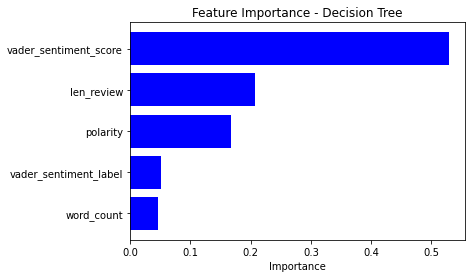

In [89]:
# Get importance
importance_dt = tree_model.feature_importances_

# Prepare a DataFrame for better handling
df_importance = pd.DataFrame({'feature': X.columns, 'importance': importance_dt})

# Sort the DataFrame by importance
df_importance = df_importance.sort_values('importance', ascending=True)

# Plot
plt.barh(df_importance['feature'], df_importance['importance'], color='b')
plt.xlabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.show()


## Sentiment Analysis (after sparsity reduction)

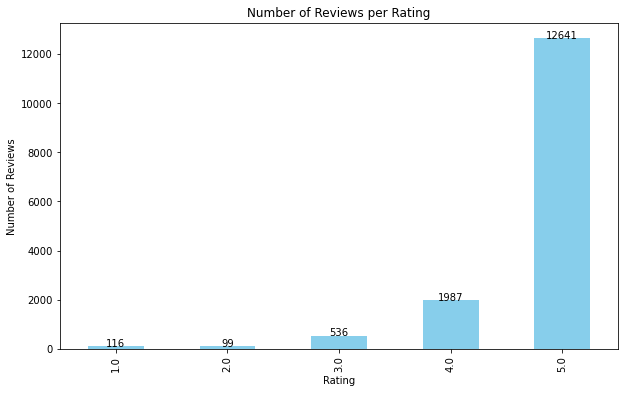

In [132]:
# Calculate the counts for each rating
rating_counts = recent_data.groupby('overall').size()

# Generate a bar plot for the counts
plt.figure(figsize=(10, 6))
bars = rating_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Reviews per Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

# Annotate the bars with the count values
for i, value in enumerate(rating_counts.iteritems()):
    rating, count = value
    plt.text(i, count, count, ha='center')

plt.show()


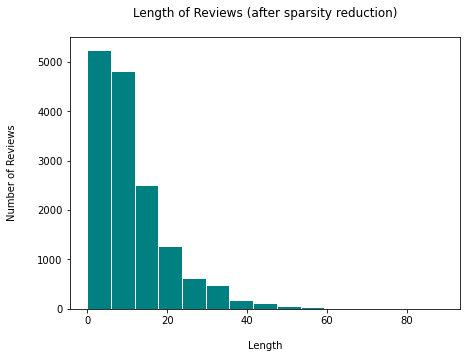

In [90]:
# Length of Reviews
recent_data["a_len_review"] = recent_data["retained_words"].astype(str).apply(len)
recent_data["a_len_review"].plot(kind = "hist", bins = 15, linewidth = 1, color = "teal", figsize = (7,5), edgecolor="white")
plt.title("Length of Reviews (after sparsity reduction)", pad = 20)
plt.xlabel("Length", labelpad = 15)
plt.ylabel("Number of Reviews", labelpad=20)
plt.show()

Review lengths were visualized and the majority of the reviews had a length of approximately 0-20 characters. Additionally, the word count was observed to be up to 10 words. The application of sparsity reduction techniques resulted in a significant reduction in the data size.

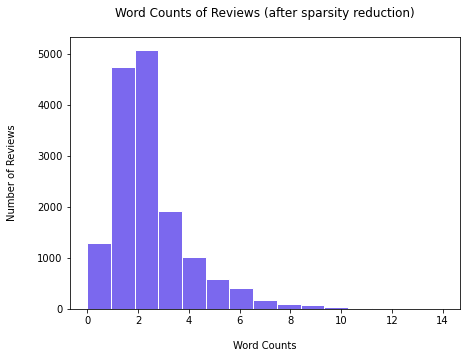

In [91]:
#Number of words in each review
recent_data["a_word_count"] = recent_data["retained_words"].apply(lambda x: len(str(x).split()))
recent_data["a_word_count"].plot(kind = "hist", bins = 15, linewidth = 1, color = "MediumSlateBlue", figsize = (7,5), edgecolor="white")
plt.title("Word Counts of Reviews (after sparsity reduction)", pad = 20)
plt.xlabel("Word Counts", labelpad = 15)
plt.ylabel("Number of Reviews", labelpad=20)
plt.show()

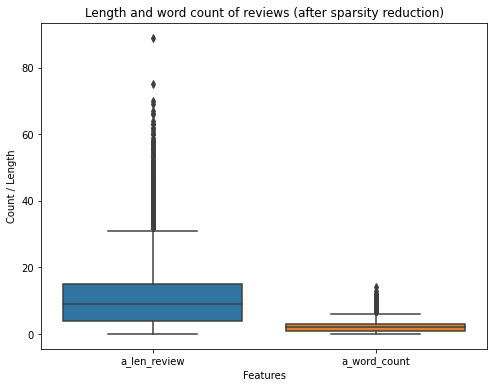

In [92]:
#Boxplot of word counts and length
plt.figure(figsize=(8, 6))
sns.boxplot(data=recent_data[['a_len_review', 'a_word_count']])
plt.title("Length and word count of reviews (after sparsity reduction)")
plt.xlabel("Features")
plt.ylabel("Count / Length")
plt.show()

In [93]:
# Print summary statistics
wc_summary = recent_data['a_word_count'].describe()
print("Word Count Statistics:")
print(wc_summary)

# Print summary statistics
len_summary = recent_data['a_len_review'].describe()
print("Length Statistics:")
print(len_summary)

#Print summary statistics
rating_summary = recent_data['overall'].describe()
print("Summary of Rating:")
print(rating_summary)

Word Count Statistics:
count    15379.000000
mean         2.146694
std          1.642266
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: a_word_count, dtype: float64
Length Statistics:
count    15379.000000
mean        11.222511
std          9.375945
min          0.000000
25%          4.000000
50%          9.000000
75%         15.000000
max         89.000000
Name: a_len_review, dtype: float64
Summary of Rating:
count    15379.000000
mean         4.751609
std          0.620935
min          1.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: overall, dtype: float64


In [94]:
# The number of null values in each column
print(recent_data.isna().sum())


overall                                 0
verified                                0
reviewTime                              0
reviewerID                              0
reviewText                              0
summary                                 0
style_str                               0
quarter_year                            0
year                                    0
month                                   0
pos_tags                                0
lemmatized_text                         0
retained_words                          0
len_review                              0
word_count                              0
vader_sentiment_score                   0
vader_sentiment_label                   0
afinn_sentiment_score                   0
afinn_sentiment_label                   0
sentiwordnet_sentiment_score            0
sentiwordnet_sentiment_label            0
polarity                                0
polarity_label                          0
vscore_sum_senti                  

In [95]:
# Sentiment analysis using Vader lexicon

# Function to get sentiment score
def get_sentiment_score(text):
    sentiment_dict = sia.polarity_scores(text)
    return sentiment_dict['compound']  # returning compound score

# Apply the function on 'retained_words' column
recent_data['a_vader_sentiment_score'] = recent_data['retained_words'].apply(get_sentiment_score)

# You can classify reviews into positive, neutral and negative based on sentiment score
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

recent_data['a_vader_sentiment_label'] = recent_data['a_vader_sentiment_score'].apply(classify_sentiment)


In [96]:
# Sentiment analysis using AFINN-111 and SentiWordNet lexicon

# Function to get sentiment score and label using AFINN-111 lexicon
def get_afinn_sentiment(text):
    sentiment_score = afinn.score(text)
    if sentiment_score > 0:
        sentiment_label = 'Positive'
    elif sentiment_score < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    return sentiment_score, sentiment_label

# Function to get sentiment score and label using SentiWordNet lexicon
def get_sentiwordnet_sentiment(text):
    sentiment_score = 0.0
    word_count = 0
    
    # Iterate over each word in the text
    for word in text.split():
        synsets = list(swn.senti_synsets(word))
        
        # Check if the word has any synsets in SentiWordNet
        if synsets:
            sentiment_score += synsets[0].pos_score() - synsets[0].neg_score()
            word_count += 1
    
    # Calculate the average sentiment score
    if word_count > 0:
        sentiment_score /= word_count
    
    # Determine the sentiment label based on the score
    if sentiment_score > 0:
        sentiment_label = 'Positive'
    elif sentiment_score < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    
    return sentiment_score, sentiment_label

# Apply the functions on the 'retained_words' column
recent_data['a_afinn_sentiment_score'], recent_data['a_afinn_sentiment_label'] = zip(*recent_data['retained_words'].apply(get_afinn_sentiment))
recent_data['a_sentiwordnet_sentiment_score'], recent_data['a_sentiwordnet_sentiment_label'] = zip(*recent_data['retained_words'].apply(get_sentiwordnet_sentiment))

In [97]:
# Function to find the polarity
def find_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply the function on the 'retained_words' column
recent_data['a_polarity'] = recent_data['retained_words'].apply(find_polarity)

In [98]:
# Function to assign sentiment category based on polarity score
def assign_sentiment(polarity_score):
    if polarity_score > 0:
        return 'Positive'
    elif polarity_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the 'polarity' column to create a new 'polarity_label' column
recent_data['a_polarity_label'] = recent_data['a_polarity'].apply(assign_sentiment)


In [99]:
#Counting Sentiment type for overall sample 
positive_count_avader = recent_data['a_vader_sentiment_label'].value_counts()['Positive']
negative_count_avader = recent_data['a_vader_sentiment_label'].value_counts()['Negative']
neutral_count_avader = recent_data['a_vader_sentiment_label'].value_counts()['Neutral']

positive_count_aafinn = recent_data['a_afinn_sentiment_label'].value_counts()['Positive']
negative_count_aafinn = recent_data['a_afinn_sentiment_label'].value_counts().get('Negative', 0)
neutral_count_aafinn = recent_data['a_afinn_sentiment_label'].value_counts()['Neutral']

positive_count_asentiwordnet = recent_data['a_sentiwordnet_sentiment_label'].value_counts()['Positive']
negative_count_asentiwordnet = recent_data['a_sentiwordnet_sentiment_label'].value_counts()['Negative']
neutral_count_asentiwordnet = recent_data['a_sentiwordnet_sentiment_label'].value_counts()['Neutral']

positive_count_apolarity = recent_data['a_polarity_label'].value_counts()['Positive']
negative_count_apolarity = recent_data['a_polarity_label'].value_counts()['Negative']
neutral_count_apolarity = recent_data['a_polarity_label'].value_counts()['Neutral']

# Create a dictionary of the counts
data = {
    'Sentiment': ['Positive', 'Negative', 'Neutral'],
    'VADER': [positive_count_avader, negative_count_avader, neutral_count_avader],
    'AFINN': [positive_count_aafinn, negative_count_aafinn, neutral_count_aafinn],
    'SentiWordNet': [positive_count_asentiwordnet, negative_count_asentiwordnet, neutral_count_asentiwordnet],
    'Polarity': [positive_count_apolarity, negative_count_apolarity, neutral_count_apolarity]
}

# Create the dataframe
sentiment_counts_dfa = pd.DataFrame(data)

# Set 'Sentiment' column as index
sentiment_counts_dfa.set_index('Sentiment', inplace=True)

In [100]:
sentiment_counts_dfa

,VADER,AFINN,SentiWordNet,Polarity
Sentiment,,,,
Positive,12012,11736,8898,11677
Negative,40,0,326,20
Neutral,3327,3643,6155,3682


- VADER: VADER lexicon identified 12,012 positive sentiments, 40 negative sentiments, and 3,327 neutral sentiments.
- AFINN: AFINN lexicon detected 11,736 positive sentiments, 0 negative sentiments, and 3,643 neutral sentiments.
- SentiWordNet: SentiWordNet lexicon assigned 8,898 positive sentiments, 326 negative sentiments, and 6,155 neutral sentiments.
- Polarity: The polarity column indicates that VADER has the highest number of positive sentiments (11,677), followed by SentiWordNet (8,898), AFINN (11,736), and finally, the polarity calculated (11,677).

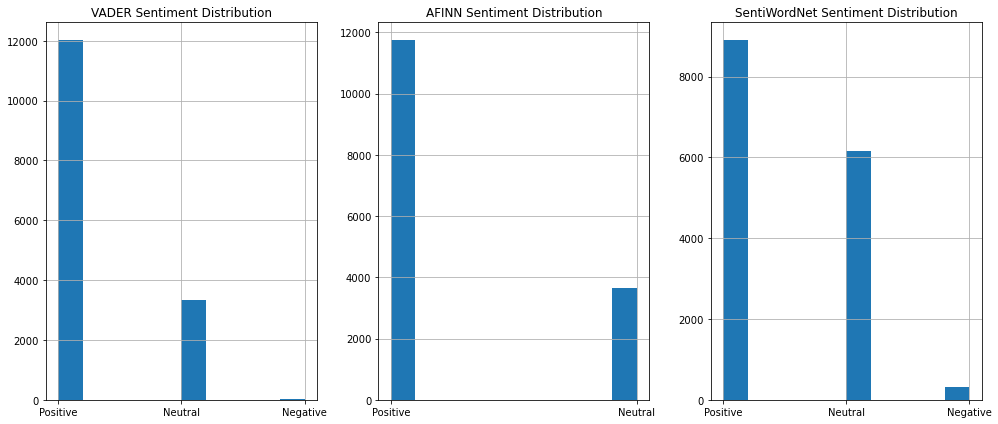

In [101]:

# Assuming that sentiment scores are stored as pandas Series objects
plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
recent_data['a_vader_sentiment_label'].hist()
plt.title('VADER Sentiment Distribution')

plt.subplot(1,3,2)
recent_data['a_afinn_sentiment_label'].hist()
plt.title('AFINN Sentiment Distribution')

plt.subplot(1,3,3)
recent_data['a_sentiwordnet_sentiment_label'].hist()
plt.title('SentiWordNet Sentiment Distribution')

plt.tight_layout()
plt.show()

In [102]:
recent_data.head()

,overall,verified,reviewTime,reviewerID,reviewText,summary,style_str,quarter_year,year,month,...,a_len_review,a_word_count,a_vader_sentiment_score,a_vader_sentiment_label,a_afinn_sentiment_score,a_afinn_sentiment_label,a_sentiwordnet_sentiment_score,a_sentiwordnet_sentiment_label,a_polarity,a_polarity_label
0,5.0,True,2017-12-07,A1XL1WKRIGSTGE,elvis still best,five stars,"{""Format:"": "" Audio CD""}",2017Q4,2017,12,...,10,2,0.6369,Positive,3.0,Positive,0.1250,Positive,1.000,Positive
1,5.0,True,2018-03-19,A1RY96KKGQ84EE,michael good,five stars,"{""Format:"": "" Audio CD""}",2018Q1,2018,3,...,4,1,0.4404,Positive,3.0,Positive,0.5000,Positive,0.700,Positive
2,5.0,True,2018-01-17,A3HO0XCG4KZ16R,great album come michael jackson greatest hits...,great album it come with michael jackson great...,"{""Format:"": "" Audio CD""}",2018Q1,2018,1,...,39,8,0.7506,Positive,6.0,Positive,0.0000,Neutral,0.525,Positive
3,5.0,True,2017-07-25,A3TM7P9GGJ6F4C,outstanding album hits love one hundred percent,five stars,"{""Format:"": "" Audio CD""}",2017Q3,2017,7,...,26,5,0.6369,Positive,3.0,Positive,0.1250,Positive,0.500,Positive
4,3.0,True,2017-05-31,A2N6RNHQJ65T0F,since bought cd okay best music already,great if you don't have his music already,"{""Format:"": "" Audio CD""}",2017Q2,2017,5,...,17,4,0.6369,Positive,3.0,Positive,0.1875,Positive,1.000,Positive


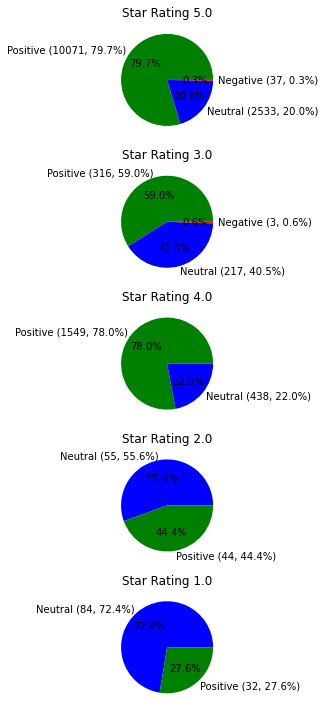

In [103]:
# Define the color scheme
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}

# Get the unique ratings
unique_ratings = recent_data['overall'].unique()

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(unique_ratings), ncols=1, figsize=(10, 10))  # Adjust the figsize as desired

# Iterate over each star rating and create a pie chart in each subplot
for i, rating in enumerate(unique_ratings):
    # Select the data for this rating
    rating_data = recent_data[recent_data['overall'] == rating]
    
    # Drop rows where 'a_vader_sentiment_label' is NaN
    rating_data = rating_data.dropna(subset=['a_vader_sentiment_label'])
    
    # Group by sentiment and calculate counts
    sentiment_counts = rating_data['a_vader_sentiment_label'].value_counts()
    
    # Calculate total count and percentages
    total_count = sentiment_counts.sum()
    percentages = sentiment_counts / total_count * 100
    
    # Create labels
    labels = [f'{sentiment} ({count}, {percentage:.1f}%)' for sentiment, count, percentage in zip(sentiment_counts.index, sentiment_counts, percentages)]
    
    # Get the subplot for this rating
    ax = axes[i]
    
    # Plot the pie chart
    ax.pie(sentiment_counts, labels=labels, colors=[colors[sentiment] for sentiment in sentiment_counts.index], autopct='%1.1f%%')
    ax.set_title(f'Star Rating {rating}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


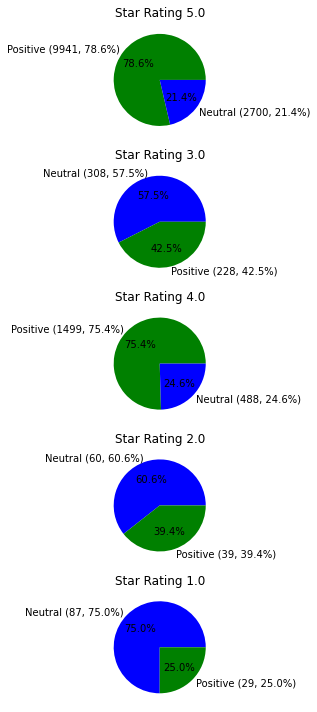

In [104]:
# Define the color scheme
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}

# Get the unique ratings
unique_ratings = recent_data['overall'].unique()

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(unique_ratings), ncols=1, figsize=(10, 10))  # Adjust the figsize as desired

# Iterate over each star rating and create a pie chart in each subplot
for i, rating in enumerate(unique_ratings):
    # Select the data for this rating
    rating_data = recent_data[recent_data['overall'] == rating]
    
    # Drop rows where 'a_vader_sentiment_label' is NaN
    rating_data = rating_data.dropna(subset=['a_afinn_sentiment_label'])
    
    # Group by sentiment and calculate counts
    sentiment_counts = rating_data['a_afinn_sentiment_label'].value_counts()
    
    # Calculate total count and percentages
    total_count = sentiment_counts.sum()
    percentages = sentiment_counts / total_count * 100
    
    # Create labels
    labels = [f'{sentiment} ({count}, {percentage:.1f}%)' for sentiment, count, percentage in zip(sentiment_counts.index, sentiment_counts, percentages)]
    
    # Get the subplot for this rating
    ax = axes[i]
    
    # Plot the pie chart
    ax.pie(sentiment_counts, labels=labels, colors=[colors[sentiment] for sentiment in sentiment_counts.index], autopct='%1.1f%%')
    ax.set_title(f'Star Rating {rating}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


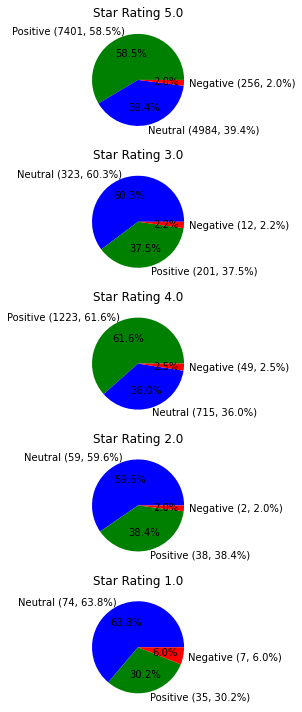

In [105]:
# Define the color scheme
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}

# Get the unique ratings
unique_ratings = recent_data['overall'].unique()

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(unique_ratings), ncols=1, figsize=(10, 10))  # Adjust the figsize as desired

# Iterate over each star rating and create a pie chart in each subplot
for i, rating in enumerate(unique_ratings):
    # Select the data for this rating
    rating_data = recent_data[recent_data['overall'] == rating]
    
    # Drop rows where 'a_vader_sentiment_label' is NaN
    rating_data = rating_data.dropna(subset=['a_sentiwordnet_sentiment_label'])
    
    # Group by sentiment and calculate counts
    sentiment_counts = rating_data['a_sentiwordnet_sentiment_label'].value_counts()
    
    # Calculate total count and percentages
    total_count = sentiment_counts.sum()
    percentages = sentiment_counts / total_count * 100
    
    # Create labels
    labels = [f'{sentiment} ({count}, {percentage:.1f}%)' for sentiment, count, percentage in zip(sentiment_counts.index, sentiment_counts, percentages)]
    
    # Get the subplot for this rating
    ax = axes[i]
    
    # Plot the pie chart
    ax.pie(sentiment_counts, labels=labels, colors=[colors[sentiment] for sentiment in sentiment_counts.index], autopct='%1.1f%%')
    ax.set_title(f'Star Rating {rating}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


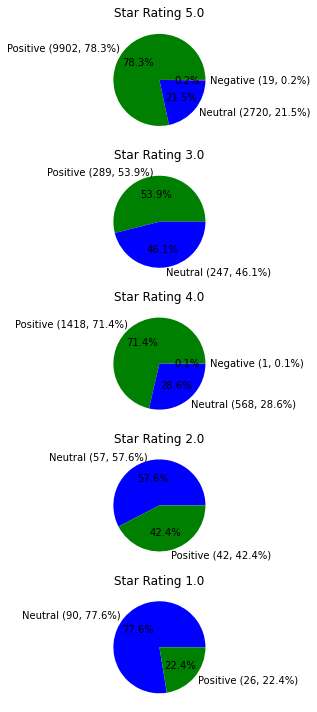

In [106]:
# Define the color scheme
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}

# Get the unique ratings
unique_ratings = recent_data['overall'].unique()

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(unique_ratings), ncols=1, figsize=(10, 10))  # Adjust the figsize as desired

# Iterate over each star rating and create a pie chart in each subplot
for i, rating in enumerate(unique_ratings):
    # Select the data for this rating
    rating_data = recent_data[recent_data['overall'] == rating]
    
    # Drop rows where 'a_vader_sentiment_label' is NaN
    rating_data = rating_data.dropna(subset=['a_polarity_label'])
    
    # Group by sentiment and calculate counts
    sentiment_counts = rating_data['a_polarity_label'].value_counts()
    
    # Calculate total count and percentages
    total_count = sentiment_counts.sum()
    percentages = sentiment_counts / total_count * 100
    
    # Create labels
    labels = [f'{sentiment} ({count}, {percentage:.1f}%)' for sentiment, count, percentage in zip(sentiment_counts.index, sentiment_counts, percentages)]
    
    # Get the subplot for this rating
    ax = axes[i]
    
    # Plot the pie chart
    ax.pie(sentiment_counts, labels=labels, colors=[colors[sentiment] for sentiment in sentiment_counts.index], autopct='%1.1f%%')
    ax.set_title(f'Star Rating {rating}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


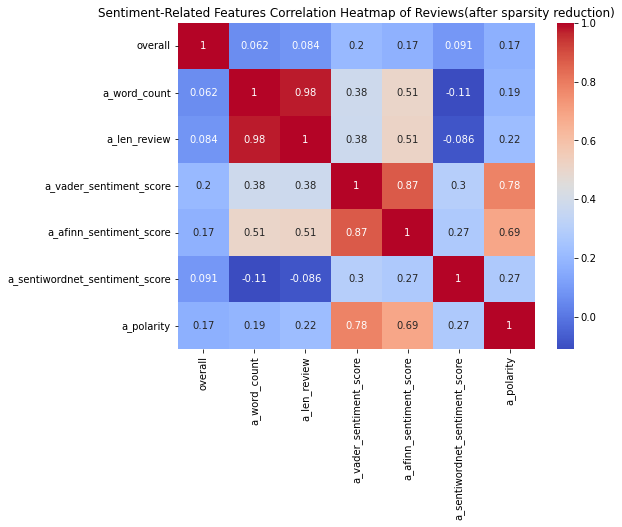

In [107]:
#To create heatmap and identify relationship between length of reviews word count and obtained sentiment

#Create a corr_data for selected columns
corr_data = recent_data[['overall', 'a_word_count', 'a_len_review', 'a_vader_sentiment_score', 'a_afinn_sentiment_score', 'a_sentiwordnet_sentiment_score', 'a_polarity']]

# Calculate the correlation matrix
corr_matrix = corr_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Sentiment-Related Features Correlation Heatmap of Reviews(after sparsity reduction)")
plt.show()

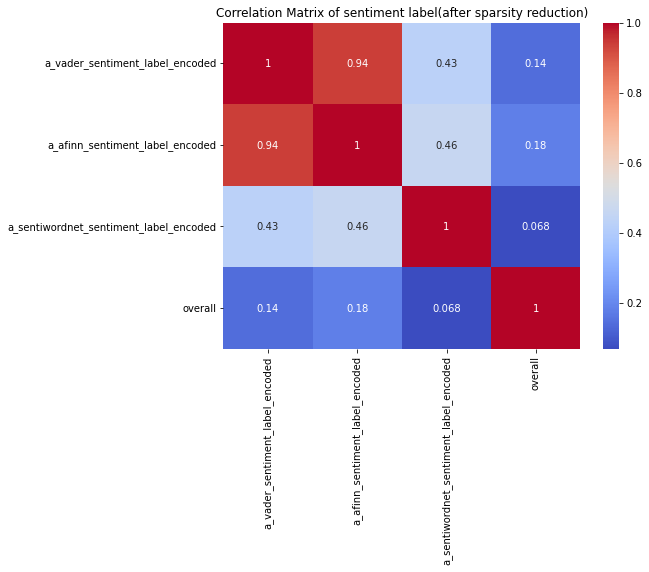

In [108]:
# Define a mapping function to assign numerical values to sentiment labels
def map_sentiment_label(label):
    if label == 'Positive':
        return 2
    elif label == 'Neutral':
        return 0
    elif label == 'Negative':
        return 1

# Apply the mapping function to the label columns
recent_data['a_vader_sentiment_label_encoded'] = recent_data['a_vader_sentiment_label'].map(map_sentiment_label)
recent_data['a_afinn_sentiment_label_encoded'] = recent_data['a_afinn_sentiment_label'].map(map_sentiment_label)
recent_data['a_sentiwordnet_sentiment_label_encoded'] = recent_data['a_sentiwordnet_sentiment_label'].map(map_sentiment_label)

# Calculate the correlation between the encoded label columns
correlation_matrix = recent_data[['a_vader_sentiment_label_encoded', 'a_afinn_sentiment_label_encoded', 'a_sentiwordnet_sentiment_label_encoded', 'overall']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of sentiment label(after sparsity reduction)')
plt.show()

In [109]:
# Normalizing the scores
min_max_scaler = preprocessing.MinMaxScaler()

# List of sentiment scores
sentiment_scores = ['a_vader_sentiment_score', 'a_afinn_sentiment_score', 'a_sentiwordnet_sentiment_score', 'a_polarity']

# Normalize sentiment scores
recent_data[sentiment_scores] = min_max_scaler.fit_transform(recent_data[sentiment_scores])
recent_data.head()

,overall,verified,reviewTime,reviewerID,reviewText,summary,style_str,quarter_year,year,month,...,a_vader_sentiment_label,a_afinn_sentiment_score,a_afinn_sentiment_label,a_sentiwordnet_sentiment_score,a_sentiwordnet_sentiment_label,a_polarity,a_polarity_label,a_vader_sentiment_label_encoded,a_afinn_sentiment_label_encoded,a_sentiwordnet_sentiment_label_encoded
0,5.0,True,2017-12-07,A1XL1WKRIGSTGE,elvis still best,five stars,"{""Format:"": "" Audio CD""}",2017Q4,2017,12,...,Positive,0.176471,Positive,0.461538,Positive,1.000000,Positive,2,2,2
1,5.0,True,2018-03-19,A1RY96KKGQ84EE,michael good,five stars,"{""Format:"": "" Audio CD""}",2018Q1,2018,3,...,Positive,0.176471,Positive,0.692308,Positive,0.800000,Positive,2,2,2
2,5.0,True,2018-01-17,A3HO0XCG4KZ16R,great album come michael jackson greatest hits...,great album it come with michael jackson great...,"{""Format:"": "" Audio CD""}",2018Q1,2018,1,...,Positive,0.352941,Positive,0.384615,Neutral,0.683333,Positive,2,2,0
3,5.0,True,2017-07-25,A3TM7P9GGJ6F4C,outstanding album hits love one hundred percent,five stars,"{""Format:"": "" Audio CD""}",2017Q3,2017,7,...,Positive,0.176471,Positive,0.461538,Positive,0.666667,Positive,2,2,2
4,3.0,True,2017-05-31,A2N6RNHQJ65T0F,since bought cd okay best music already,great if you don't have his music already,"{""Format:"": "" Audio CD""}",2017Q2,2017,5,...,Positive,0.176471,Positive,0.500000,Positive,1.000000,Positive,2,2,2


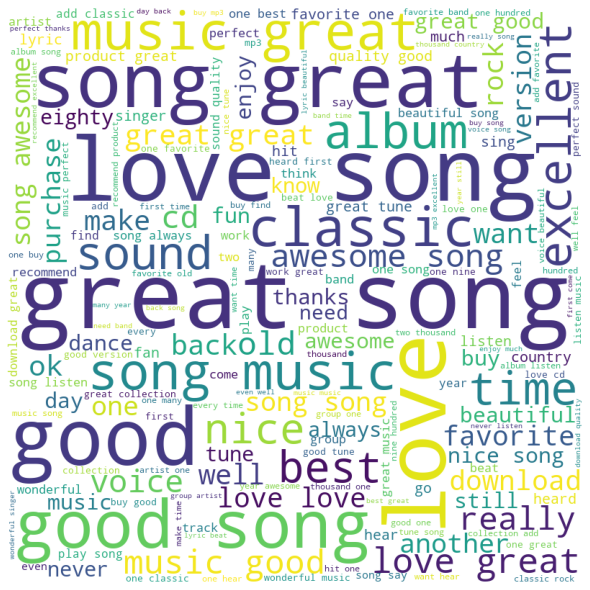

In [110]:
# Join all the reviews in the 'retained_words' column into one big text
text = ' '.join(recent_data['retained_words'])

# Generate the word cloud from the text

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [111]:
analyser = SentimentIntensityAnalyzer()
from nltk.corpus import sentiwordnet as swn
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wn.ADJ
    elif treebank_tag.startswith('V'):
        return wn.VERB
    elif treebank_tag.startswith('N'):
        return wn.NOUN
    elif treebank_tag.startswith('R'):
        return wn.ADV
    else:
        return ''

def get_sentiwordnet_score(text):
    sentiment = 0.0
    tokens_count = 0

    tagged_text = pos_tag(word_tokenize(text))

    for word, tag in tagged_text:
        wn_tag = get_wordnet_pos(tag)
        if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
            continue

        lemma = word
        synsets = wn.synsets(lemma, pos=wn_tag)
        if not synsets:
            continue

        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())

        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1

    if not tokens_count:
        return 0

    if sentiment >= 0:
        return 1

    return -1

## Regression

In [112]:
# Convert sentiment labels to numerical values
sentiment_mapping = {
    'Positive': 2,
    'Neutral': 0,
    'Negative': 1
}
recent_data['a_vader_sentiment_label'] = recent_data['a_vader_sentiment_label'].map(sentiment_mapping)
recent_data['a_afinn_sentiment_label'] = recent_data['a_afinn_sentiment_label'].map(sentiment_mapping)
recent_data['a_sentiwordnet_sentiment_label'] = recent_data['a_sentiwordnet_sentiment_label'].map(sentiment_mapping)


In [113]:
recent_data.head()

,overall,verified,reviewTime,reviewerID,reviewText,summary,style_str,quarter_year,year,month,...,a_vader_sentiment_label,a_afinn_sentiment_score,a_afinn_sentiment_label,a_sentiwordnet_sentiment_score,a_sentiwordnet_sentiment_label,a_polarity,a_polarity_label,a_vader_sentiment_label_encoded,a_afinn_sentiment_label_encoded,a_sentiwordnet_sentiment_label_encoded
0,5.0,True,2017-12-07,A1XL1WKRIGSTGE,elvis still best,five stars,"{""Format:"": "" Audio CD""}",2017Q4,2017,12,...,2,0.176471,2,0.461538,2,1.000000,Positive,2,2,2
1,5.0,True,2018-03-19,A1RY96KKGQ84EE,michael good,five stars,"{""Format:"": "" Audio CD""}",2018Q1,2018,3,...,2,0.176471,2,0.692308,2,0.800000,Positive,2,2,2
2,5.0,True,2018-01-17,A3HO0XCG4KZ16R,great album come michael jackson greatest hits...,great album it come with michael jackson great...,"{""Format:"": "" Audio CD""}",2018Q1,2018,1,...,2,0.352941,2,0.384615,0,0.683333,Positive,2,2,0
3,5.0,True,2017-07-25,A3TM7P9GGJ6F4C,outstanding album hits love one hundred percent,five stars,"{""Format:"": "" Audio CD""}",2017Q3,2017,7,...,2,0.176471,2,0.461538,2,0.666667,Positive,2,2,2
4,3.0,True,2017-05-31,A2N6RNHQJ65T0F,since bought cd okay best music already,great if you don't have his music already,"{""Format:"": "" Audio CD""}",2017Q2,2017,5,...,2,0.176471,2,0.500000,2,1.000000,Positive,2,2,2


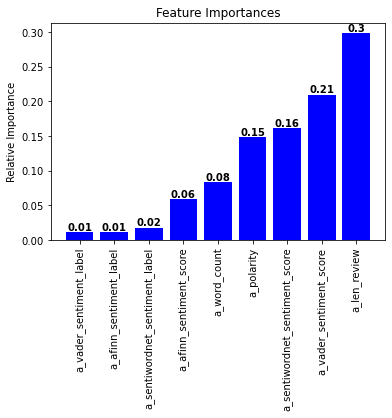

In [114]:
from sklearn.ensemble import RandomForestClassifier

# Target variable
y_F_a = recent_data['overall']

# Feature matrix
x_F_a = recent_data[['a_len_review', 'a_word_count', 'a_vader_sentiment_score', 'a_vader_sentiment_label', 'a_afinn_sentiment_score', 'a_afinn_sentiment_label', 'a_sentiwordnet_sentiment_score', 'a_sentiwordnet_sentiment_label', 'a_polarity']]

# Initialize a random forest classifier
clf = RandomForestClassifier()

# Assume X is your feature data and y is your target variable 
clf.fit(x_F_a, y_F_a)

# Get the feature importances
importances = clf.feature_importances_

# Now let's print the feature importances in descending order
features = x_F_a.columns
indices = np.argsort(importances)

# Create a bar chart
plt.bar(range(len(indices)), importances[indices], color='b', align='center')

# Y ticks
plt.xticks(range(len(indices)), [features[i] for i in indices], rotation='vertical')

# X label
plt.ylabel('Relative Importance')

# Title
plt.title('Feature Importances')

# Add importance values on top of the bars
for i, imp in zip(range(len(indices)), importances[indices]):
    plt.text(i, imp, str(round(imp, 2)), ha = 'center', va = 'bottom', color = 'black', fontweight = 'bold')

plt.show()


In [115]:
# The sentiment scores used as features and the "overall" field as the target variable
X_a = recent_data[['a_vader_sentiment_score','a_polarity', 'a_len_review', 'a_word_count', 'a_vader_sentiment_label']]
y_a = recent_data['overall']


# Define SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled_a, y_resampled_a = smote_enn.fit_resample(X_a, y_a)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_resampled_a, y_resampled_a, test_size=0.2, random_state=42)



In [116]:
# Regression Model fitting

# Linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

#Random Forest Regression
RanFor_model = RandomForestRegressor(random_state=42)
RanFor_model.fit(X_train, y_train)

#Gradient Boosting Regression
gradboost_model = GradientBoostingRegressor(random_state=42)
gradboost_model.fit(X_train, y_train)

#Ordinal logistic regression model
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode ordinal target variable
y_train_encoded = label_encoder.fit_transform(y_train)
OL_model = LogisticAT()
OL_model.fit(X_train, y_train_encoded)

LogisticAT()

In [117]:
print("The results of regression model on 'retained_words' are as follows:")
# Linear Regression
y_pred_lr = model.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))
    
# Ridge Regression
y_pred_ridge = ridge_model.predict(X_test)
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("Ridge Regression R2 Score:", r2_score(y_test, y_pred_ridge))

# Support Vector Regression
y_pred_svr = svr_model.predict(X_test)
print("Support Vector Regression MSE:", mean_squared_error(y_test, y_pred_svr))
print("Support Vector Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))
print("Support Vector Regression R2 Score:", r2_score(y_test, y_pred_svr))

# Decision Tree Regression
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree Regression MSE:", mean_squared_error(y_test, y_pred_tree))
print("Decision Tree Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tree)))
print("Decision Tree Regression R2 Score:", r2_score(y_test, y_pred_tree))


#Random Forest Regression
y_pred_RF = RanFor_model.predict(X_test)
print("Random Forest Regression MSE:", mean_squared_error(y_test, y_pred_RF))
print("Random Forest Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_RF)))
print("Random Forest Regression R2 Score:", r2_score(y_test, y_pred_RF))

#Gradient Boosting Regression
y_pred_gb = gradboost_model.predict(X_test)
print("Gradient Boosting Regression MSE:", mean_squared_error(y_test, y_pred_gb))
print("Gradient Boosting Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("Gradient Boosting Regression R2 Score:", r2_score(y_test, y_pred_gb))

#Ordinal logistic regression model
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_ol = OL_model.predict(X_test)
print("Ordinal logistic Regression MSE:", mean_squared_error(y_test, y_pred_ol))
print("Ordinal logistic Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ol)))
print("Ordinal logistic Regression R2 Score:", r2_score(y_test_encoded, y_pred_ol))



The results of regression model on 'retained_words' are as follows:
Linear Regression MSE: 2.0761738683503466
Linear Regression RMSE: 1.4408934271313567
Linear Regression R2 Score: 0.21657249550256197
Ridge Regression MSE: 2.0761001976466993
Ridge Regression RMSE: 1.440867862660105
Ridge Regression R2 Score: 0.21660029454983476
Support Vector Regression MSE: 2.0032601257561695
Support Vector Regression RMSE: 1.415365721556153
Support Vector Regression R2 Score: 0.24408590961248533
Decision Tree Regression MSE: 0.2156655657498022
Decision Tree Regression RMSE: 0.4643980682020568
Decision Tree Regression R2 Score: 0.9186203339917558
Random Forest Regression MSE: 0.17586846006358414
Random Forest Regression RMSE: 0.4193667369541654
Random Forest Regression R2 Score: 0.9336374516182037
Gradient Boosting Regression MSE: 0.7288452482545763
Gradient Boosting Regression RMSE: 0.8537243397341886
Gradient Boosting Regression R2 Score: 0.724976109800191
Ordinal logistic Regression MSE: 3.12575366

In [118]:
# Coefficients for the Linear Regression model
coeff_df_lr = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient (LR)'])  
print(coeff_df_lr)

# Coefficients for the Ridge Regression model
coeff_df_ridge = pd.DataFrame(ridge_model.coef_, X.columns, columns=['Coefficient (Ridge)'])  
print(coeff_df_ridge)


                       Coefficient (LR)
vader_sentiment_score          3.518580
polarity                       1.337395
len_review                     0.094280
word_count                    -0.768266
vader_sentiment_label         -0.152603
                       Coefficient (Ridge)
vader_sentiment_score             3.477028
polarity                          1.346908
len_review                        0.094346
word_count                       -0.768053
vader_sentiment_label            -0.147997


- For the Linear Regression model, the coefficients indicate that the vader_sentiment_score has a coefficient of 3.518580, polarity has a coefficient of 1.337395, len_review has a coefficient of 0.094280, word_count has a coefficient of -0.768266, and vader_sentiment_label has a coefficient of -0.152603.

- Similarly, for the Ridge Regression model, the coefficients are slightly different but still similar, with vader_sentiment_score having a coefficient of 3.477028, polarity having a coefficient of 1.346908, len_review having a coefficient of 0.094346, word_count having a coefficient of -0.768053, and vader_sentiment_label having a coefficient of -0.147997.

The coefficients from a linear regression model tell us the relationship between the independent variables and the dependent variable. In your case, the independent variables are 'vader_sentiment_score', 'afinn_sentiment_score', and 'sentiwordnet_sentiment_score'. 

In this context, the coefficients represent the change in the response variable (the product ratings, assuming that is your target variable in the regression model) for a one-unit change in the predictor variables (the sentiment scores), all other predictors held constant.

The positive coefficients for the vader_sentiment_score and sentiwordnet_sentiment_score suggest that an increase in these scores is associated with an increase in the product rating. The negative coefficient for the afinn_sentiment_score suggests that an increase in this score is associated with a decrease in the product rating.

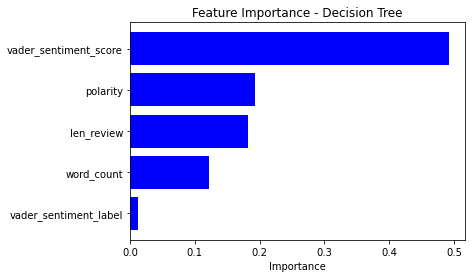

In [119]:
# Get importance
importance_dt = tree_model.feature_importances_

# Prepare a DataFrame for better handling
df_importance = pd.DataFrame({'feature': X.columns, 'importance': importance_dt})

# Sort the DataFrame by importance
df_importance = df_importance.sort_values('importance', ascending=True)

# Plot
plt.barh(df_importance['feature'], df_importance['importance'], color='b')
plt.xlabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.show()


# Cross-validation 

Importance of libraries used:

- `sklearn.model_selection`: Used for performing k-fold cross-validation.

- `sklearn.metrics`: Provides functions for calculating metrics such as RMSE, MAE, and R-squared.

- `mord`: Library for ordinal regression, used specifically for the LogisticAT model.

- `imbalanced-learn`: Library for handling imbalanced datasets, used for resampling.

- `StandardScaler`: Used for feature scaling.

- `KFold`: Used for splitting the dataset into folds for cross-validation.

- `mean_absolute_error`: Function to calculate Mean Absolute Error.

- `RandomForestRegressor, GradientBoostingRegressor, LinearRegression, DecisionTreeRegressor, SVR, Ridge`: Regression models from scikit-learn.

- `LabelEncoder`: Used for encoding the target variable.

- `SMOTEENN`: A combination of SMOTE and Edited Nearest Neighbors, used for resampling.

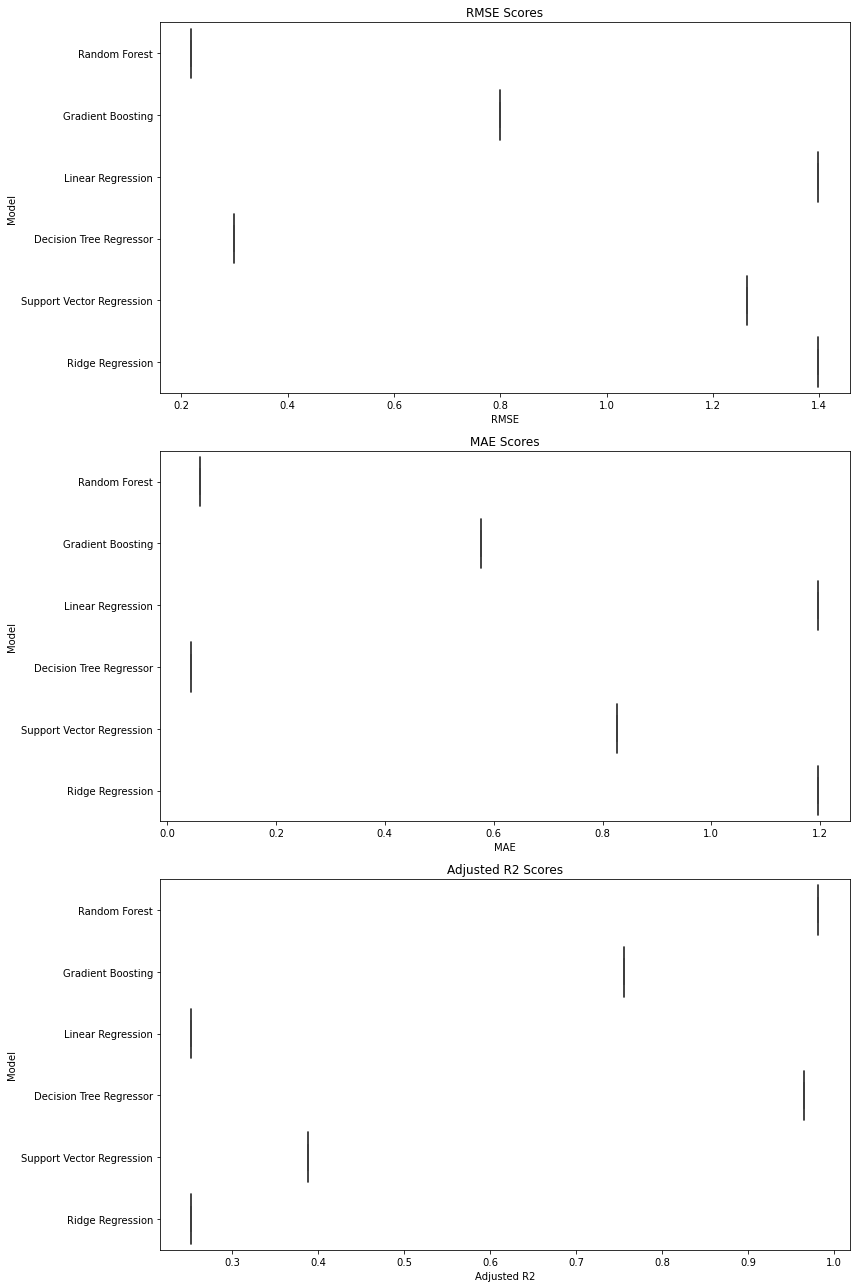

In [148]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# Function to calculate root mean squared error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function to calculate adjusted R-squared
def adjusted_r2(y_true, y_pred, p):
    n = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    return adj_r2

# Define models
models = [RandomForestRegressor(random_state=42),
          GradientBoostingRegressor(random_state=42),
          LinearRegression(),
          DecisionTreeRegressor(random_state=42),
          SVR(),
          Ridge()]

# Model names
model_names = ["Random Forest", "Gradient Boosting", "Linear Regression", "Decision Tree Regressor", "Support Vector Regression", "Ridge Regression"]

# Get features (X) and target (y)
X = recent_data[['a_vader_sentiment_score','a_polarity', 'a_len_review', 'a_word_count', 'a_vader_sentiment_label']]
y = recent_data['overall']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply the resampling
X_res, y_res = resampling.fit_resample(X_scaled, y)

# Convert resampled data into DataFrame
X_res = pd.DataFrame(X_res, columns=X.columns)

# Apply the models and store results
results = []
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in zip(model_names, models):
    rmse_scores = []
    mae_scores = []
    adj_r2_scores = []
    
    for train_index, test_index in kfold.split(X_res):
        X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
        y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        rmse_scores.append(rmse(y_test, y_pred))
        mae_scores.append(mean_absolute_error(y_test, y_pred))
        adj_r2_scores.append(adjusted_r2(y_test, y_pred, X_train.shape[1]))
        
    results.append((name, np.mean(rmse_scores), np.mean(mae_scores), np.mean(adj_r2_scores)))

# Convert the results to a DataFrame
results_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "Adjusted R2"])

# Create separate figures for RMSE, MAE and Adjusted R2 scores
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# Plot for RMSE scores
sns.boxplot(data=results_df, x="RMSE", y="Model", ax=ax[0], orient="h")
ax[0].set_title('RMSE Scores')
ax[0].set_xlabel('RMSE')
ax[0].set_ylabel('Model')

# Plot for MAE scores
sns.boxplot(data=results_df, x="MAE", y="Model", ax=ax[1], orient="h")
ax[1].set_title('MAE Scores')
ax[1].set_xlabel('MAE')
ax[1].set_ylabel('Model')

# Plot for Adjusted R2 scores
sns.boxplot(data=results_df, x="Adjusted R2", y="Model", ax=ax[2], orient="h")
ax[2].set_title('Adjusted R2 Scores')
ax[2].set_xlabel('Adjusted R2')
ax[2].set_ylabel('Model')

# Show the plot
plt.tight_layout()
plt.show()


In [149]:
print(results_df)

                       Model      RMSE       MAE  Adjusted R2
0              Random Forest  0.218676  0.060720     0.981684
1          Gradient Boosting  0.799433  0.576478     0.755720
2          Linear Regression  1.398391  1.196336     0.252684
3    Decision Tree Regressor  0.299570  0.044379     0.965540
4  Support Vector Regression  1.264997  0.827168     0.388419
5           Ridge Regression  1.398392  1.196397     0.252683


The table displays the performance metrics of different regression models on the dataset:

- Random Forest: RMSE = 0.218676, MAE = 0.060720, Adjusted R2 = 0.981684.
- Gradient Boosting: RMSE = 0.799433, MAE = 0.576478, Adjusted R2 = 0.755720.
- Linear Regression: RMSE = 1.398391, MAE = 1.196336, Adjusted R2 = 0.252684.
- Decision Tree Regressor: RMSE = 0.299570, MAE = 0.044379, Adjusted R2 = 0.965540.
- Support Vector Regression: RMSE = 1.264997, MAE = 0.827168, Adjusted R2 = 0.388419.
- Ridge Regression: RMSE = 1.398392, MAE = 1.196397, Adjusted R2 = 0.252683.

The metrics indicate the accuracy and goodness of fit of each model. Lower values of RMSE and MAE indicate better performance, while higher values of Adjusted R2 indicate better explanatory power of the model.

## Topic Modeling

The task of topic modeling is to uncover the underlying topics that appear in your reviews. This can give insights into what specific aspects of a product or service customers are discussing. For the analysis, you will compare the main topics that emerge from satisfied customers (e.g., those who give high ratings) vs. dissatisfied customers (those who give low ratings).

Here is a step by step guide on how you could approach this:

#### 1) Data Preparation:

You would first need to split your dataset into reviews from satisfied customers and reviews from dissatisfied customers. For simplicity, you might consider ratings of 4 and 5 as satisfied and ratings of 1 and 2 as dissatisfied.

In [124]:
satisfied_reviews = recent_data[recent_data['overall'] >= 4]['retained_words']
dissatisfied_reviews = recent_data[recent_data['overall'] <= 2]['retained_words']

#### 2) Topic Modeling:
The Latent Dirichlet Allocation (LDA) is a commonly used method for topic modeling. We will use LDA to find the most important topics for each group of reviews. We try to tune the number of topics parameter for better results.

In [135]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert text data to a bag of words
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm_satisfied = vectorizer.fit_transform(satisfied_reviews)
dtm_dissatisfied = vectorizer.fit_transform(dissatisfied_reviews)

# Run LDA
lda = LatentDirichletAllocation(n_components=8, random_state=42)
lda_satisfied = lda.fit(dtm_satisfied)
lda_dissatisfied = lda.fit(dtm_dissatisfied)

In [136]:
# View the topics for dissatisfied reviews
for index,topic in enumerate(lda_satisfied.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['sound', 'cd', 'like', 'best', 'want', 'track', 'make', 'buy', 'say', 'fun', 'version', 'heard', 'really', 'song', 'good']


THE TOP 15 WORDS FOR TOPIC #1
['know', 'good', 'really', 'song', 'voice', 'buy', 'time', 'download', 'version', 'make', 'track', 'like', 'listen', 'sound', 'want']


THE TOP 15 WORDS FOR TOPIC #2
['time', 'lyric', 'listen', 'love', 'fan', 'beat', 'song', 'buy', 'fun', 'like', 'play', 'purchase', 'need', 'classic', 'ok']


THE TOP 15 WORDS FOR TOPIC #3
['day', 'play', 'song', 'make', 'listen', 'good', 'heard', 'hear', 'classic', 'like', 'time', 'voice', 'lyric', 'old', 'download']


THE TOP 15 WORDS FOR TOPIC #4
['purchase', 'love', 'make', 'hear', 'lyric', 'say', 'best', 'fan', 'enjoy', 'feel', 'like', 'version', 'album', 'know', 'song']


THE TOP 15 WORDS FOR TOPIC #5
['like', 'know', 'play', 'album', 'download', 'make', 'lyric', 'time', 'listen', 'buy', 'work', 'best', 'love', 'purchase', 'song']


THE TOP 15 WORDS FOR TOPIC #6
['

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


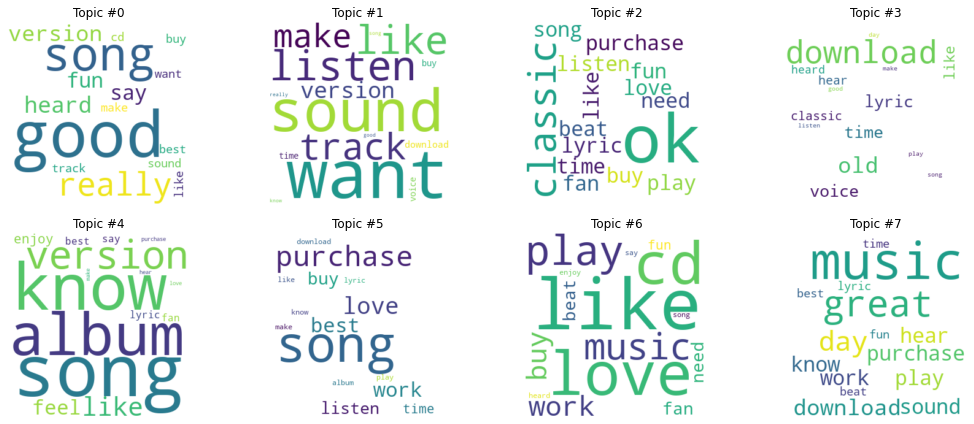

In [138]:
# Define function to create word clouds
def create_word_cloud(topic_words, topic_num, ax):
    wordcloud = WordCloud(width=300, height=300, background_color='white').generate_from_frequencies(topic_words)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(f'Topic #{topic_num}')

# Create subplot grid
fig, axs = plt.subplots(2, 4, figsize=(15, 6))  # 2 rows, 4 columns for 8 topics
axs = axs.flatten()

# Generate word cloud for each topic
for idx, topic in enumerate(lda_satisfied.components_):
    top_words = topic.argsort()[-15:]
    topic_words = {vectorizer.get_feature_names()[i]: topic[i] for i in top_words}
    create_word_cloud(topic_words, idx, axs[idx])

plt.tight_layout()
plt.show()


In [139]:
# View the topics for dissatisfied reviews
for index,topic in enumerate(lda_dissatisfied.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')


THE TOP 15 WORDS FOR TOPIC #0
['sound', 'cd', 'like', 'best', 'want', 'track', 'make', 'buy', 'say', 'fun', 'version', 'heard', 'really', 'song', 'good']


THE TOP 15 WORDS FOR TOPIC #1
['know', 'good', 'really', 'song', 'voice', 'buy', 'time', 'download', 'version', 'make', 'track', 'like', 'listen', 'sound', 'want']


THE TOP 15 WORDS FOR TOPIC #2
['time', 'lyric', 'listen', 'love', 'fan', 'beat', 'song', 'buy', 'fun', 'like', 'play', 'purchase', 'need', 'classic', 'ok']


THE TOP 15 WORDS FOR TOPIC #3
['day', 'play', 'song', 'make', 'listen', 'good', 'heard', 'hear', 'classic', 'like', 'time', 'voice', 'lyric', 'old', 'download']


THE TOP 15 WORDS FOR TOPIC #4
['purchase', 'love', 'make', 'hear', 'lyric', 'say', 'best', 'fan', 'enjoy', 'feel', 'like', 'version', 'album', 'know', 'song']


THE TOP 15 WORDS FOR TOPIC #5
['like', 'know', 'play', 'album', 'download', 'make', 'lyric', 'time', 'listen', 'buy', 'work', 'best', 'love', 'purchase', 'song']


THE TOP 15 WORDS FOR TOPIC #6
['

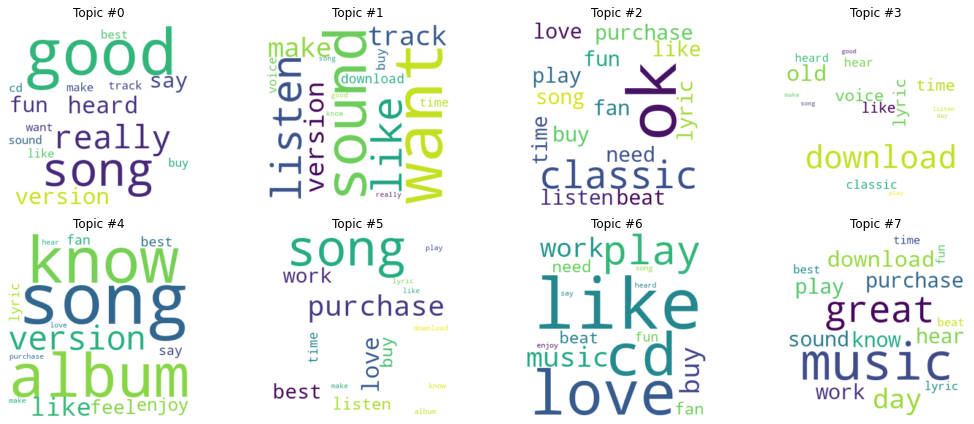

In [140]:
# Define function to create word clouds
def create_word_cloud(topic_words, topic_num, ax):
    wordcloud = WordCloud(width=300, height=300, background_color='white').generate_from_frequencies(topic_words)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(f'Topic #{topic_num}')

# Create subplot grid
fig, axs = plt.subplots(2, 4, figsize=(15, 6))  # 2 rows, 4 columns for 8 topics
axs = axs.flatten()

# Generate word cloud for each topic
for idx, topic in enumerate(lda_dissatisfied.components_):
    top_words = topic.argsort()[-15:]
    topic_words = {vectorizer.get_feature_names()[i]: topic[i] for i in top_words}
    create_word_cloud(topic_words, idx, axs[idx])

plt.tight_layout()
plt.show()
